<H1 style="text-align: center;font-size:30px ; font-family: 'Times New Roman'; color:#00008B"> Project Title</H1>

<p style="text-align: center;font-size:22px ;font-weight: bold ; font-family: 'Times New Roman'"> Analysis of Funding Trends in the Indian Startup Ecosystem</p>

<H1 style="text-align: center;font-size:30px ; font-family: 'Times New Roman'; color: #00008B"> Project Description</H1>

#### The goal of this initiative is to provide information to important players who are considering entering the Indian startup ecosystem.

#### In order to do this, I will examine important indicators of investment received by startups in India from 2018 to 2021. Management will make strategic business decisions using these information.

#### I created a hypothesis to test the dataset so that I might get a valid conclusion. In order to determine which year is more likely to attract investment from investors, the data were analyzed in terms of year founded and funding amount received.



<H1 style="text-align: center;font-size:30px ; font-family: 'Times New Roman'; color: #00008B"> Questions :</H1>

<ol type="1"style="font-size:17px;font-weight: bold;font-family: 'Times New Roman'"> 
    <li>Does the sort of industry have an impact on funding success?</li>
    <li>Can the success of obtaining finance from investors be impacted by location?</li>
    <li>Which stage receives more investment from investors for start-ups?</li>
    <li>Who makes the biggest investments among investors?</li>
    <li>Can the startup's stage effect the amount of funding it receives from investors?</li>
</ol>

<H1 style="text-align: center;font-size:30px ; font-family: 'Times New Roman'; color: #00008B"> Hypothesis :</H1>

#### I created the null and alternate hypotheses to concentrate on two groups: companies that are technology-biased and startups that are not technology-biased, in order to further evaluate and analyze the data. Hence, the following two hypotheses are presented:

#### `NULL`: The year of start up  does not influence the funding received. 
#### `ALTERNATE`: The year of start up influences the funding received.

<H1 style="text-align: center;font-size:30px ; font-family: 'Times New Roman'; color: #00008B"> Data Preparation :</H1>

## Importing all Relevant Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy
from scipy import stats
from summarytools import dfSummary
import warnings
warnings.filterwarnings("ignore")

sns.set_theme(style="whitegrid")

import os

# numpy and pandas will be used for data handling
# seaborn and matplotlib will be used for data visualization

## Data Loading

In [2]:
# For CSV, use pandas.read_csv, this helps you to load the CSV file or data and to hande the dataframe
data_2018 = pd.read_csv('startup_funding2018.csv')
data_2019 = pd.read_csv('startup_funding2019.csv')
data_2020 = pd.read_csv('startup_funding2020.csv')
data_2021 = pd.read_csv('startup_funding2021.csv')

<H1 style="text-align: center;font-size:30px ; font-family: 'Times New Roman'; color: #00008B"> DATA CLEANING :</H1>

<p style="text-align: center;font-size:17px ; font-family: 'Times New Roman';">
    In this section, the following properties of the data loaded will be analysed:
</p>  
<ul style="font-size:17px ; font-family: 'Times New Roman';">
    <li> Data Types </li>
    <li> Missing Data </li>
    <li> Categorical data values </li>
    <li> Continous data values </li>
    <li> Duplicated data </li>
    <li> Standard rule base check, that is, checks relating to industry standards, example email, dates, websites, currencies etc</li> 

# 2018 Data Set

In [3]:
data_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 526 entries, 0 to 525
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Company Name   526 non-null    object
 1   Industry       526 non-null    object
 2   Round/Series   526 non-null    object
 3   Amount         526 non-null    object
 4   Location       526 non-null    object
 5   About Company  526 non-null    object
dtypes: object(6)
memory usage: 24.8+ KB


In [4]:
data_2018

,Company Name,Industry,Round/Series,Amount,Location,About Company
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f..."
1,Happy Cow Dairy,"Agriculture, Farming",Seed,"₹40,000,000","Mumbai, Maharashtra, India",A startup which aggregates milk from dairy far...
2,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Series A,"₹65,000,000","Gurgaon, Haryana, India",Leading Online Loans Marketplace in India
3,PayMe India,"Financial Services, FinTech",Angel,2000000,"Noida, Uttar Pradesh, India",PayMe India is an innovative FinTech organizat...
4,Eunimart,"E-Commerce Platforms, Retail, SaaS",Seed,—,"Hyderabad, Andhra Pradesh, India",Eunimart is a one stop solution for merchants ...
...,...,...,...,...,...,...
521,Udaan,"B2B, Business Development, Internet, Marketplace",Series C,225000000,"Bangalore, Karnataka, India","Udaan is a B2B trade platform, designed specif..."
522,Happyeasygo Group,"Tourism, Travel",Series A,—,"Haryana, Haryana, India",HappyEasyGo is an online travel domain.
523,Mombay,"Food and Beverage, Food Delivery, Internet",Seed,7500,"Mumbai, Maharashtra, India",Mombay is a unique opportunity for housewives ...
524,Droni Tech,Information Technology,Seed,"₹35,000,000","Mumbai, Maharashtra, India",Droni Tech manufacture UAVs and develop softwa...


### Renaming Columns to reflect consistency

In [5]:
# rename the column headings to be consistent with other data set
data_2018.rename(columns={'Company Name':'Company/Brand','Industry':'Sector','Round/Series':'Stage','Amount':'Amount($)','Location':'HeadQuarter','About Company':'What it does'}, inplace=True)

### Cleaning the Sector Column

In [6]:
# Cleaning the Sector column to get of multiple sectors represented as one. 
#This is done by first stipping and using slicing to select the first part.
data_2018['Sector'] = data_2018['Sector'].str.split(',').str[0] 
data_2018['Sector'].unique()                            

array(['Brand Marketing', 'Agriculture', 'Credit', 'Financial Services',
       'E-Commerce Platforms', 'Cloud Infrastructure', 'Internet',
       'Market Research', 'Information Services', 'Mobile Payments',
       'B2B', 'Apps', 'Food Delivery', 'Industrial Automation',
       'Automotive', 'Finance', 'Accounting', 'Artificial Intelligence',
       'Internet of Things', 'Air Transportation', 'Food and Beverage',
       'Autonomous Vehicles', 'Enterprise Software', 'Logistics',
       'Insurance', 'Information Technology', 'Blockchain', 'Education',
       'E-Commerce', 'Renewable Energy', 'E-Learning', 'Clean Energy',
       'Transportation', 'Fitness', 'Hospitality',
       'Media and Entertainment', 'Broadcasting', 'EdTech', 'Health Care',
       '—', 'Sports', 'Big Data', 'Cloud Computing', 'Food Processing',
       'Trading Platform', 'Consumer Goods', 'Wellness', 'Fashion',
       'Consulting', 'Biotechnology', 'Communities', 'Consumer',
       'Consumer Applications', 'Mobile',

In [7]:
#rename similar sectors with wrong or different spelling to make it consistent
data_2018.replace({'Sector':{'E-Commerce Platforms':'E-Commerce','Autonomous Vehicles':'Automotive','eSports':'Sports',
                           'Funding Platform':'Crowdfunding','Crowdsourcing':'Crowdfunding','Last Mile Transportation':'Transportation',
                           'Delivery':'Logistics','Delivery Service':'Logistics','Children':'Child Care','Travel':'Transportation','Health Care':'Healthcare',
                           'Commercial Real Estate':'Real Estate','Cooking':'Catering','Fantasy Sports':'Sports','Consumer':'Consumer Goods',
                           'Consumer Lending':'Consumer Goods','Credit':'Credit Cards','Business Travel':'Transportation','Hospital':'Healthcare',
                           'Basketball':'Sports','Alternative Medicine':'Healthcare','Renewable Energy':'Energy','Clean Energy':'Energy','Music':'Music Streaming',
                           'Health Diagnostics':'Healthcare','Medical':'Healthcare','Enterprise Software':'ERP','Enterprise Resource Planning (ERP)':'ERP',
                           'Audio':'Music Streaming','Air Transportation':'Aerospace','Wellness':'Fitness','Beauty':'Cosmetics','Big Data':'Analytics',
                           'Food and Beverage':'Catering','Wealth Management':'Finance','Social Media':'Digital Media','Broadcasting':'Media and Entertainment',
                           'News':'Media and Entertainment','Packaging Services':'Logistics','Mobile':'Mobile Phones','Medical Device':'Healthcare',
                           'Continuing Education':'Education','Dental':'Healthcare','Android':'Software','Banking':'Financial Services','Training':'Education',
                           'Digital Marketing':'Advertising','Marketplace':'Advertising','Consumer Electronics':'Consumer Goods','Rental':'Facilities Support Services',
                           'Retail':'Business Development','3D Printing':'Creative Agency','Electric Vehicle':'Automotive','Industrial Automation':'Manufacturing',
                           'Battery':'Energy','Reading Apps':'Apps','B2B':'E-Commerce','Communities':'Environmental Consulting','Smart Cities':'Environmental Consulting',
                           'Health Insurance':'Insurance','Commercial':'Business Development','Digital Entertainment':'Digital Media',
                           'Cloud Infrastructure':'Cloud Computing','Marketing':'Advertising','Events':'Creative Agency','Food Delivery':'Catering',
                           'Artificial Intelligence':'AI','Business Intelligence':'ERP','Information Services':'IT','Information Technology':'IT',
                           'E-Learning':'Education','Tourism':'Hospitality','Industrial':'Manufacturing','Internet':'IT','Internet of Things':'IoT',
                           'Farming':'Agriculture','Food Processing':'Catering','Collaboration':'Human Resources','Computer':'IT','Career Planning':'Human Resources',
                           'Wedding':'Customer Service','Online Games':'Gaming','—':'Unknown','Brand Marketing':'Advertising'}}, inplace=True)

### Cleaning the Stage Column

In [8]:
data_2018['Stage'].unique()

array(['Seed', 'Series A', 'Angel', 'Series B', 'Pre-Seed',
       'Private Equity', 'Venture - Series Unknown', 'Grant',
       'Debt Financing', 'Post-IPO Debt', 'Series H', 'Series C',
       'Series E', 'Corporate Round', 'Undisclosed',
       'https://docs.google.com/spreadsheets/d/1x9ziNeaz6auNChIHnMI8U6kS7knTr3byy_YBGfQaoUA/edit#gid=1861303593',
       'Series D', 'Secondary Market', 'Post-IPO Equity',
       'Non-equity Assistance', 'Funding Round'], dtype=object)

In [9]:
data_2018.replace({'Stage':{'Pre-Seed':'Seed','Private Equity':'Seed','Venture - Series Unknown':'Seed',
                           'Debt Financing':'Seed','Post-IPO Debt':'Seed','Corporate Round':'Seed','Undisclosed':'Seed',
                           'Post-IPO Equity':'Seed','Non-equity Assistance':'Seed','Funding Round':'Seed','Debt':'Seed',
                            'Angel':'Seed','Secondary Market':'Seed','Equity':'Seed','Grant':'Seed','Unknown':'Seed'}},inplace=True)
data_2018['Stage'].unique()

array(['Seed', 'Series A', 'Series B', 'Series H', 'Series C', 'Series E',
       'https://docs.google.com/spreadsheets/d/1x9ziNeaz6auNChIHnMI8U6kS7knTr3byy_YBGfQaoUA/edit#gid=1861303593',
       'Series D'], dtype=object)

In [10]:
data_2018.loc[data_2018['Stage']=='https://docs.google.com/spreadsheets/d/1x9ziNeaz6auNChIHnMI8U6kS7knTr3byy_YBGfQaoUA/edit#gid=1861303593']

,Company/Brand,Sector,Stage,Amount($),HeadQuarter,What it does
178,BuyForexOnline,Transportation,https://docs.google.com/spreadsheets/d/1x9ziNe...,2000000,"Bangalore, Karnataka, India",BuyForexOnline.com is India's first completely...


Looking at the 'What it does' and 'Company/Brand', it is obvious the sector should be in the FinTech Sector, this needs to be corrected and the stage replaced with 'Unknwon' since there is no futher information to tell the stage

In [11]:
# correcting the name of the sector from transportation to FinTech based on the information above.
data_2018.iloc[178].replace({'Transportation':'FinTech'},inplace=True) 

In [12]:
# correcting the stage name to Unknown since there is no information to correct it to the right stage. 
data_2018.iloc[178].replace({'https://docs.google.com/spreadsheets/d/1x9ziNeaz6auNChIHnMI8U6kS7knTr3byy_YBGfQaoUA/edit#gid=1861303593':'Seed'},inplace=True) 

In [13]:
data_2018['Stage'].unique()

array(['Seed', 'Series A', 'Series B', 'Series H', 'Series C', 'Series E',
       'Series D'], dtype=object)

### Cleaning the Amount($) Column

Since some of the currencies are in ₹ (rupees) and others in $ (dollars), the rupees are changed to dollars based on the current exchange rate.

Duty is to select all rows where 'Amount' column is in rupees

In [14]:
# since some of the currencies are in ₹ (rupees) and others in $ (dollars), the rupees are changed to dollars based on the current exchange rate
# select all rows where 'Amount($)' column is in rupees

# this should be done before stripping off the currency symbol in order to identify the values and make the conversion 
rupees_index = data_2018.index[data_2018['Amount($)'].str.contains('₹')]
rupees_index 

Int64Index([  1,   2,   6,   7,  15,  19,  22,  23,  30,  37,
            ...
            488, 496, 500, 507, 509, 513, 514, 516, 517, 524],
           dtype='int64', length=144)

In [15]:
# removing or stripping all special characters form the amount column
#data_2018["Amount"]=data_2018.Amount.apply(lambda x: str(x).replace("-",np.nan))
data_2018['Amount($)']=data_2018['Amount($)'].replace('—', np.nan)    # replacing '-' in the amount column with 0
data_2018['Amount($)']=data_2018['Amount($)'].apply(lambda x: str(x).replace("₹" ,""))   # replacing '₹' in the amount column with nothing
data_2018['Amount($)']=data_2018['Amount($)'].apply(lambda x: str(x).replace("$" ,""))   # replacing '$' in the amount column with nothing
data_2018['Amount($)']=data_2018['Amount($)'].apply(lambda x: str(x).replace("," ,""))   # replacing ',' in the amount column with nothing

In [16]:
# change the data type from a string to a float
data_2018['Amount($)']=pd.to_numeric(data_2018['Amount($)'], errors='coerce')  

In [17]:
#Convert the rows with rupees to dollars
#Multiply the rupees values in the amount column with 0.0146 which is the average 2018 exchange rate from rupees to dollars
# the is done on only the records with rupees whose indexes were stored to the rupees_index variable
data_2018.loc[rupees_index,['Amount($)']]=data_2018.loc[rupees_index,['Amount($)']].values*0.0146
data_2018.loc[rupees_index,["Amount($)"]].head()

,Amount($)
1,584000.0
2,949000.0
6,233600.0
7,730000.0
15,1460000.0


In [18]:
# all nan values are to be filled with median on the 
data_2018['Amount($)']=data_2018['Amount($)'].fillna(data_2018['Amount($)'].median())

### Cleaning the HeadQuarter Column

In [19]:
#Strip the location data to only the city-area.
# use ',' as the delimeter to separate them and select preferred choice with slicing
data_2018['HeadQuarter']=data_2018['HeadQuarter'].str.split(',').str[0]     
data_2018['HeadQuarter'].unique()

array(['Bangalore', 'Mumbai', 'Gurgaon', 'Noida', 'Hyderabad',
       'Bengaluru', 'Kalkaji', 'Delhi', 'India', 'Hubli', 'New Delhi',
       'Chennai', 'Mohali', 'Kolkata', 'Pune', 'Jodhpur', 'Kanpur',
       'Ahmedabad', 'Azadpur', 'Haryana', 'Cochin', 'Faridabad', 'Jaipur',
       'Kota', 'Anand', 'Bangalore City', 'Belgaum', 'Thane', 'Margão',
       'Indore', 'Alwar', 'Kannur', 'Trivandrum', 'Ernakulam',
       'Kormangala', 'Uttar Pradesh', 'Andheri', 'Mylapore', 'Ghaziabad',
       'Kochi', 'Powai', 'Guntur', 'Kalpakkam', 'Bhopal', 'Coimbatore',
       'Worli', 'Alleppey', 'Chandigarh', 'Guindy', 'Lucknow'],
      dtype=object)

In [20]:
# replacing wrongly spelt names and similar names entered differently
data_2018.replace({'HeadQuarter':{'Bangalore':'Bengaluru','Bangalore City':'Bengaluru','New Delhi':'Delhi','India':'Delhi'}}, inplace=True)

### Creating an Artificial `Founded` Column 

This column is being created to hold the year in which the startups were founded. 
This is on the operational assumption that empty values are to be replace with the year in which the data set is located, hence 2018 will be used for all the entries in this data set. 

In [21]:
# creating a founded column and assign 2018 as the value for all
data_2018['Founded']=2018

In [22]:
# checking for null values
data_2018.isnull().sum()

Company/Brand    0
Sector           0
Stage            0
Amount($)        0
HeadQuarter      0
What it does     0
Founded          0
dtype: int64

In [23]:
# checking for duplicate entries
data_2018.duplicated().value_counts()

False    525
True       1
dtype: int64

In [24]:
 # remove the duplicate record
data_2018=data_2018.drop_duplicates(keep='first')  

# 2019 Data Set

In [25]:
data_2019.head()

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
0,Bombay Shaving,NaN,NaN,Ecommerce,Provides a range of male grooming products,Shantanu Deshpande,Sixth Sense Ventures,"$6,300,000",NaN
1,Ruangguru,2014.0,Mumbai,Edtech,A learning platform that provides topic-based ...,"Adamas Belva Syah Devara, Iman Usman.",General Atlantic,"$150,000,000",Series C
2,Eduisfun,NaN,Mumbai,Edtech,It aims to make learning fun via games.,Jatin Solanki,"Deepak Parekh, Amitabh Bachchan, Piyush Pandey","$28,000,000",Fresh funding
3,HomeLane,2014.0,Chennai,Interior design,Provides interior designing solutions,"Srikanth Iyer, Rama Harinath","Evolvence India Fund (EIF), Pidilite Group, FJ...","$30,000,000",Series D
4,Nu Genes,2004.0,Telangana,AgriTech,"It is a seed company engaged in production, pr...",Narayana Reddy Punyala,Innovation in Food and Agriculture (IFA),"$6,000,000",NaN


In [26]:
data_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company/Brand  89 non-null     object 
 1   Founded        60 non-null     float64
 2   HeadQuarter    70 non-null     object 
 3   Sector         84 non-null     object 
 4   What it does   89 non-null     object 
 5   Founders       86 non-null     object 
 6   Investor       89 non-null     object 
 7   Amount($)      89 non-null     object 
 8   Stage          43 non-null     object 
dtypes: float64(1), object(8)
memory usage: 6.4+ KB


### Cleaning the Founded Column

In [27]:
# convert the data type from float to a string
data_2019['Founded']=data_2019['Founded'].astype(str)   
data_2019['Founded']=data_2019.Founded.str.split('.').str[0]    # removing the decimal points in the year
data_2019['Founded'].unique()

array(['nan', '2014', '2004', '2013', '2010', '2018', '2019', '2017',
       '2011', '2015', '2016', '2012', '2008'], dtype=object)

In [28]:
# changing the data type to numeric
data_2019['Founded']=pd.to_numeric(data_2019['Founded'],errors='coerce', downcast='unsigned')

In [29]:
# all nan values are to be filled with unknown on the 
data_2019['Founded']=data_2019['Founded'].fillna(2019)

In [30]:
data_2019['Founded'].unique()

array([2019., 2014., 2004., 2013., 2010., 2018., 2017., 2011., 2015.,
       2016., 2012., 2008.])

### Cleaning the HeadQuarter Column

In [31]:
data_2019['HeadQuarter'].unique()

array([nan, 'Mumbai', 'Chennai', 'Telangana', 'Pune', 'Bangalore',
       'Noida', 'Delhi', 'Ahmedabad', 'Gurugram', 'Haryana', 'Chandigarh',
       'Jaipur', 'New Delhi', 'Surat', 'Uttar pradesh', 'Hyderabad',
       'Rajasthan'], dtype=object)

In [32]:
# replacing wrongly spelt names and similar names entered differently
data_2019.replace({'HeadQuarter':{'Bangalore':'Bengaluru','New Delhi':'Delhi','nan':'Delhi'}}, inplace=True)

In [33]:
# all nan values are to be filled with Delhi on the assuption that this is an India Start Up data set
data_2019['HeadQuarter']=data_2019['HeadQuarter'].fillna('Delhi')

### Cleaning the Sector Column

In [34]:
data_2019['Sector'].unique()

array(['Ecommerce', 'Edtech', 'Interior design', 'AgriTech', 'Technology',
       'SaaS', 'AI & Tech', 'E-commerce', 'E-commerce & AR', 'Fintech',
       'HR tech', 'Food tech', 'Health', 'Healthcare', 'Safety tech',
       'Pharmaceutical', 'Insurance technology', 'AI', 'Foodtech', 'Food',
       'IoT', 'E-marketplace', 'Robotics & AI', 'Logistics', 'Travel',
       'Manufacturing', 'Food & Nutrition', 'Social Media', nan,
       'E-Sports', 'Cosmetics', 'B2B', 'Jewellery', 'B2B Supply Chain',
       'Games', 'Food & tech', 'Accomodation', 'Automotive tech',
       'Legal tech', 'Mutual Funds', 'Cybersecurity', 'Automobile',
       'Sports', 'Healthtech', 'Yoga & wellness', 'Virtual Banking',
       'Transportation', 'Transport & Rentals',
       'Marketing & Customer loyalty', 'Infratech', 'Hospitality',
       'Automobile & Technology', 'Banking'], dtype=object)

In [35]:
#rename similar sectors with wrong or different spelling to make it consistent
data_2019.replace({'Sector':{'Ecommerce':'E-Commerce','Edtech':'EdTech','Interior design':'Home Decor','Virtual Banking':'Financial Services',
                           'AgriTech':'AgTech','E-commerce & AR':'E-Commerce','Fintech':'FinTech','Infratech':'IT','B2B Supply Chain':'E-Commerce',
                           'Marketing & Customer loyalty':'Customer Service','Automobile & Technology':'Automotive','Transport & Rentals':'Transportation',
                           'HR tech':'Human Resources','AI & Tech':'AI','E-commerce':'E-Commerce','Travel':'Transportation','Health Care':'Healthcare',
                           'Commercial Real Estate':'Real Estate','Cooking':'Catering','Fantasy Sports':'Sports','Consumer':'Consumer Goods',
                           'Healthtech':'Healthcare','E-Sports':'Sports','Mutual Funds':'Finance','Legal tech':'Legal','Accomodation':'Real Estate',
                           'Consumer Lending':'Consumer Goods','Credit':'Credit Cards','Business Travel':'Transportation','Hospital':'Healthcare',
                           'Automobile':'Automotive','Alternative Medicine':'Healthcare','Renewable Energy':'Energy','Clean Energy':'Energy','Music':'Music Streaming',
                           'Health Diagnostics':'Healthcare','Medical':'Healthcare','Enterprise Software':'ERP','Enterprise Resource Planning (ERP)':'ERP',
                           'Audio':'Music Streaming','Air Transportation':'Aerospace','Yoga & wellness':'Fitness','Beauty':'Cosmetics','Big Data':'Analytics',
                           'Food and Beverage':'Catering','Wealth Management':'Finance','Social Media':'Digital Media','Broadcasting':'Media and Entertainment',
                           'News':'Media and Entertainment','Packaging Services':'Logistics','Mobile':'Mobile Phones','Medical Device':'Healthcare',
                           'Continuing Education':'Education','Dental':'Healthcare','Android':'Software','Banking':'Financial Services','Training':'Education',
                           'Digital Marketing':'Advertising','Marketplace':'Advertising','Consumer Electronics':'Consumer Goods','Rental':'Facilities Support Services',
                           'Retail':'Business Development','3D Printing':'Creative Agency','Electric Vehicle':'Automotive','Industrial Automation':'Manufacturing',
                           'Battery':'Energy','Reading Apps':'Apps','B2B':'E-Commerce','Communities':'Environmental Consulting','Smart Cities':'Environmental Consulting',
                           'Health Insurance':'Insurance','Commercial':'Business Development','Digital Entertainment':'Digital Media','Food & tech':'Catering',
                           'Cloud Infrastructure':'Cloud Computing','Marketing':'Advertising','Events':'Creative Agency','Food tech':'Catering',
                           'Artificial Intelligence':'AI','Business Intelligence':'ERP','Information Services':'IT','Information Technology':'IT',
                           'E-Learning':'Education','Tourism':'Hospitality','Industrial':'Manufacturing','Internet':'IT','Internet of Things':'IoT',
                           'Jewellery':'Fashion','Food & Nutrition':'Healthcare','Robotics & AI':'AI', 'E-marketplace':'E-Commerce','Foodtech':'Catering',
                           'Insurance technology':'Insurance','Pharmaceutical':'Healthcare','Safety tech':'Cybersecurity',
                           'Technology':'IT','Farming':'Agriculture','Food Processing':'Catering','Collaboration':'Human Resources','Computer':'IT','Career Planning':'Human Resources',
                           'Wedding':'Customer Service','Games':'Gaming'}}, inplace=True)
data_2019['Sector'].unique()

array(['E-Commerce', 'EdTech', 'Home Decor', 'AgTech', 'IT', 'SaaS', 'AI',
       'FinTech', 'Human Resources', 'Catering', 'Health', 'Healthcare',
       'Cybersecurity', 'Insurance', 'Food', 'IoT', 'Logistics',
       'Transportation', 'Manufacturing', 'Digital Media', nan, 'Sports',
       'Cosmetics', 'Fashion', 'Gaming', 'Real Estate', 'Automotive tech',
       'Legal', 'Finance', 'Automotive', 'Fitness', 'Financial Services',
       'Customer Service', 'Hospitality'], dtype=object)

In [36]:
# all nan values are to be filled with unknown on the 
data_2019['Sector']=data_2019['Sector'].fillna('Unknown')

### Cleaning the Amount($) Column

In [37]:
# stripping off special characters
#data_2019.replace({'Amount($)':{'$':'',',':''}},inplace=True)
data_2019["Amount($)"]=data_2019['Amount($)'].apply(lambda x: str(x).replace("$" ,"")) 
data_2019["Amount($)"]=data_2019['Amount($)'].apply(lambda x: str(x).replace("," ,""))
data_2019["Amount($)"]=data_2019['Amount($)'].replace("Undisclosed" ,np.nan)

In [38]:
# change the data type to a float
# The downcast parameter is used to set the data type to float
data_2019['Amount($)'] = pd.to_numeric(data_2019['Amount($)'], errors='coerce', downcast='float')                                                            

In [39]:
# all nan values are to be filled with median on the 
data_2019['Amount($)']=data_2019['Amount($)'].fillna(data_2019['Amount($)'].median())

### Cleaning the Stage Column

In [40]:
data_2019['Stage'].unique()

array([nan, 'Series C', 'Fresh funding', 'Series D', 'Pre series A',
       'Series A', 'Series G', 'Series B', 'Post series A',
       'Seed funding', 'Seed fund', 'Series E', 'Series F', 'Series B+',
       'Seed round', 'Pre-series A'], dtype=object)

In [41]:
# replacing wrongly spelt and similar enteries to promote consistency
data_2019.replace({'Stage':{'Seed fund':'Seed','Post series A':'Series A',
                           'Pre series A':'Series A','Series B+':'Series B','Fresh funding':'Seed',
                           'Pre-series A':'Series A','Seed round':'Seed','Seed funding':'Seed','Debt':'Seed',
                            'Angel':'Seed','Secondary Market':'Seed','Equity':'Seed','Grant':'Seed'}},inplace=True)
data_2019['Stage'].unique()

array([nan, 'Series C', 'Seed', 'Series D', 'Series A', 'Series G',
       'Series B', 'Series E', 'Series F'], dtype=object)

In [42]:
# all nan values are to be filled with unknown on the 
data_2019['Stage']=data_2019['Stage'].fillna('Seed')

### Cleaning the Founders Column

In [43]:
# all nan values are to be filled with unknown on the 
data_2019['Founders']=data_2019['Founders'].fillna('Unknown')

In [44]:
data_2019.isnull().sum()

Company/Brand    0
Founded          0
HeadQuarter      0
Sector           0
What it does     0
Founders         0
Investor         0
Amount($)        0
Stage            0
dtype: int64

In [45]:
# checking for duplicate entries
data_2019.duplicated().value_counts()

False    89
dtype: int64

# 2020 Data Set

In [46]:
data_2020.head()

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage,Unnamed: 9
0,Aqgromalin,2019,Chennai,AgriTech,Cultivating Ideas for Profit,"Prasanna Manogaran, Bharani C L",Angel investors,"$200,000",NaN,NaN
1,Krayonnz,2019,Bangalore,EdTech,An academy-guardian-scholar centric ecosystem ...,"Saurabh Dixit, Gurudutt Upadhyay",GSF Accelerator,"$100,000",Pre-seed,NaN
2,PadCare Labs,2018,Pune,Hygiene management,Converting bio-hazardous waste to harmless waste,Ajinkya Dhariya,Venture Center,Undisclosed,Pre-seed,NaN
3,NCOME,2020,New Delhi,Escrow,Escrow-as-a-service platform,Ritesh Tiwari,"Venture Catalysts, PointOne Capital","$400,000",NaN,NaN
4,Gramophone,2016,Indore,AgriTech,Gramophone is an AgTech platform enabling acce...,"Ashish Rajan Singh, Harshit Gupta, Nishant Mah...","Siana Capital Management, Info Edge","$340,000",NaN,NaN


In [47]:
data_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1055 entries, 0 to 1054
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Company/Brand  1055 non-null   object
 1   Founded        843 non-null    object
 2   HeadQuarter    961 non-null    object
 3   Sector         1042 non-null   object
 4   What it does   1055 non-null   object
 5   Founders       1043 non-null   object
 6   Investor       1017 non-null   object
 7   Amount($)      1052 non-null   object
 8   Stage          591 non-null    object
 9   Unnamed: 9     2 non-null      object
dtypes: object(10)
memory usage: 82.5+ KB


### Cleaning the Founded Column

In [48]:
data_2020['Founded'].unique()

array(['2019', '2018', '2020', '2016', '2008', '2015', '2017', '2014',
       '1998', '2007', '2011', '1982', '2013', '2009', '2012', '1995',
       '2010', '2006', '1978', nan, '1999', '1994', '2005', '1973', '-',
       '2002', '2004', '2001'], dtype=object)

In [49]:
# all - values are to be filled with nan 
data_2020['Founded']=data_2020['Founded'].replace({'-':np.nan},inplace=True)

In [50]:
# changing the data type to numeric
data_2020['Founded']=pd.to_numeric(data_2020['Founded'],errors='coerce',downcast='signed')

In [51]:
# all nan values are to be filled with 2020
data_2020['Founded']=data_2020['Founded'].fillna(2020)

### Cleaning the HeadQuarter Column

In [52]:
data_2020['HeadQuarter'].unique()

array(['Chennai', 'Bangalore', 'Pune', 'New Delhi', 'Indore', 'Hyderabad',
       'Gurgaon', 'Belgaum', 'Noida', 'Mumbai', 'Andheri', 'Jaipur',
       'Ahmedabad', 'Kolkata', 'Tirunelveli, Tamilnadu', 'Thane', nan,
       'Singapore', 'Gurugram', 'Gujarat', 'Haryana', 'Kerala', 'Jodhpur',
       'Jaipur, Rajastan', 'Delhi', 'Frisco, Texas, United States',
       'California', 'Dhingsara, Haryana', 'New York, United States',
       'Patna', 'San Francisco, California, United States',
       'San Francisco, United States', 'San Ramon, California',
       'Paris, Ile-de-France, France', 'Plano, Texas, United States',
       'Sydney', 'San Francisco Bay Area, Silicon Valley, West Coast',
       'Bangaldesh', 'London, England, United Kingdom',
       'Sydney, New South Wales, Australia', 'Milano, Lombardia, Italy',
       'Palmwoods, Queensland, Australia', 'France',
       'San Francisco Bay Area, West Coast, Western US',
       'Trivandrum, Kerala, India', 'Cochin', 'Samastipur, Bihar',
 

In [53]:
#strip and select only the City name, which is the first part and ignore the country 
data_2020['HeadQuarter']=data_2020['HeadQuarter'].str.split(',').str[0] 

In [54]:
# replacing wrongly spelt names and similar names entered differently
data_2020.replace({'HeadQuarter':{'Bangalore':'Bengaluru','New Delhi':'Delhi','nan':'Delhi','Bangaldesh':'Bangladesh',
                                  'Banglore':'Bengaluru'}}, inplace=True)

In [55]:
# all nan values are to be filled with Delhi on the assuption that this is an India Start Up data set
data_2020['HeadQuarter']=data_2020['HeadQuarter'].fillna('Delhi')

### Cleaning the Sector Column

In [56]:
data_2020['Sector'].unique()

array(['AgriTech', 'EdTech', 'Hygiene management', 'Escrow',
       'Networking platform', 'FinTech', 'Crowdsourcing',
       'Food & Bevarages', 'HealthTech', 'Fashion startup',
       'Food Industry', 'Food Delivery', 'Virtual auditing startup',
       'E-commerce', 'Gaming', 'Work fulfillment', 'AI startup',
       'Telecommunication', 'Logistics', 'Tech Startup', 'Sports',
       'Retail', 'Medtech', 'Tyre management', 'Cloud company',
       'Software company', 'Venture capitalist', 'Renewable player',
       'IoT startup', 'SaaS startup', 'Aero company', 'Marketing company',
       'Retail startup', 'Co-working Startup', 'Finance company',
       'Tech company', 'Solar Monitoring Company',
       'Video sharing platform', 'Gaming startup',
       'Video streaming platform', 'Consumer appliances',
       'Blockchain startup', 'Conversational AI platform', 'Real Estate',
       'SaaS platform', 'AI platform', 'Fusion beverages', 'HR Tech',
       'Job portal', 'Hospitality', 'Digit

In [57]:
#rename similar sectors with wrong or different spelling to make it consistent
data_2020.replace({'Sector':{'Ecommerce':'E-Commerce','Edtech':'EdTech','Interior design':'Home Decor','Virtual Banking':'Financial Services',
                           'AgriTech':'AgTech','E-commerce & AR':'E-Commerce','Fintech':'FinTech','Infratech':'IT','B2B Supply Chain':'E-Commerce',
                           'Marketing & Customer loyalty':'Customer Service','Automobile & Technology':'Automotive','Transport & Rentals':'Transportation',
                           'HR tech':'Human Resources','AI & Tech':'AI','E-commerce':'E-Commerce','Travel':'Transportation','Health Care':'Healthcare',
                           'Commercial Real Estate':'Real Estate','Cooking':'Catering','Fantasy Sports':'Sports','Consumer':'Consumer Goods',
                           'Healthtech':'Healthcare','E-Sports':'Sports','Mutual Funds':'Finance','Legal tech':'Legal','Accomodation':'Real Estate',
                           'Consumer Lending':'Consumer Goods','Credit':'Credit Cards','Business Travel':'Transportation','Hospital':'Healthcare',
                           'Automobile':'Automotive','Alternative Medicine':'Healthcare','Renewable Energy':'Energy','Clean Energy':'Energy','Music':'Music Streaming',
                           'Health Diagnostics':'Healthcare','Medical':'Healthcare','Enterprise Software':'ERP','Enterprise Resource Planning (ERP)':'ERP',
                           'Audio':'Music Streaming','Air Transportation':'Aerospace','Yoga & wellness':'Fitness','Beauty':'Cosmetics','Big Data':'Analytics',
                           'Food and Beverage':'Catering','Wealth Management':'Finance','Social Media':'Digital Media','Broadcasting':'Media and Entertainment',
                           'News':'Media and Entertainment','Packaging Services':'Logistics','Mobile':'Mobile Phones','Medical Device':'Healthcare',
                           'Continuing Education':'Education','Dental':'Healthcare','Android':'Software','Banking':'Financial Services','Training':'Education',
                           'Digital Marketing':'Advertising','Marketplace':'Advertising','Consumer Electronics':'Consumer Goods','Rental':'Facilities Support Services',
                           'Retail':'Business Development','3D Printing':'Creative Agency','Electric Vehicle':'Automotive','Industrial Automation':'Manufacturing',
                           'Battery':'Energy','Reading Apps':'Apps','B2B':'E-Commerce','Communities':'Environmental Consulting','Smart Cities':'Environmental Consulting',
                           'Health Insurance':'Insurance','Commercial':'Business Development','Digital Entertainment':'Digital Media','Food & tech':'Catering',
                           'Cloud Infrastructure':'Cloud Computing','Marketing':'Advertising','Events':'Creative Agency','Food tech':'Catering',
                           'Artificial Intelligence':'AI','Business Intelligence':'ERP','Information Services':'IT','Information Technology':'IT',
                           'E-Learning':'Education','Tourism':'Hospitality','Industrial':'Manufacturing','Internet':'IT','Internet of Things':'IoT',
                           'Jewellery':'Fashion','Food & Nutrition':'Healthcare','Robotics & AI':'AI', 'E-marketplace':'E-Commerce','Foodtech':'Catering',
                           'Insurance technology':'Insurance','Pharmaceutical':'Healthcare','Safety tech':'Cybersecurity',"Fashion startup":'Fashion',
                             'Deisgning':'Creative Agency','Pharmacy':'Healthcare','Consultancy':'Creative Agency','Tech hub':'IT','E-connect':'Digital Media',
                             'B2B Agritech':'AgTech','Food diet':'Healthcare','Preschool Daycare':'Child Care','AI Robotics':'AI','SaaS/Edtech':'Saas',
                             'Transport & Rentals':'Transportation','Transport Automation':'Transportation','Neo-banking':'Financial Services',
                             'Ad-tech':'Advertising','E-mobility':'Mobile Payment','E tailor':'E-Commerce','Estore':'E-Commerce','Housing & Rentals':'Real Estate',
                             'AI & Deep learning':'AI','Sales & Services':'Business Development','VR & SaaS':'Saas','Hygiene':'CleanTech','Cleantech':'CleanTech',
                             'Visual Media':'Media and Entertainment','Content Marktplace':'Advertising','Machine Learning':'AI','AI & Media':'AI',
                             'E-tail':'E-Commerce','Automotive and Rentals':'Automotive','ravel tech':'Transportation','AI & Data science':'AI',
                             'Finance company':'Finance','Tech company':'IT','Solar Monitoring Company':'Energy','Video sharing platform':'Media and Entertainment',
                             'Gaming startup':'Gaming','Video streaming platform':'Media and Entertainment','Consumer appliances':'Consumer Goods',
                             'Blockchain startup':'Blockchain','Conversational AI platform':'AI','SaaS platform':'Saas','AI platform':'AI',
                             'Escrow':'Legal','Networking platform':'IT','Spacetech':'Aerospace','Trading platform':'E-Commerce','AI Company':'AI',
                             'Photonics startup':'Media and Entertainment','Entertainment':'Media and Entertainment','Scanning app':'Apps',
                             'Skincare startup':'Cosmetics','Food and Beverages':'Catering','FoodTech':'Catering','Biotechnology company':'Environmental Consulting',
                             'Proptech':'Facilities Support Services','Fitness startup':'Fitness','PaaS startup':'Saas','Beverages':'Catering',
                             'Automobiles':'Automotive','Deeptech':'AI','EV startup':'Environmental Consulting','AR/VR startup':'IT','Recruitment startup':'Human Resources',
                             'Tourism & EV':'Hospitality','QSR startup':'Customer Service','Video platform':'Media and Entertainment',
                             'Fusion beverages':'Catering','Job portal':'Human Resources','Dairy startup':'Catering','Content management':'Creative Agency',
                             'Work fulfillment':'Human Resources','HR Tech':'Human Resources','Software Company':'Software','Soil-Tech':'Agriculture',
                             'Travel & SaaS':'Transportation','Hygiene management':'CleanTech','Food & Bevarages':'Catering','Food Delivery':'Catering',
                             'Virtual auditing startup':'FinTech','HealthTech':'Healthcare','AI startup':'AI','Tech Startup':'IT','Medtech':'Healthcare',
                             'Tyre management':'Automotive','Cloud company':'Cloud Computing','Software company':'Software','Venture capitalist':'Finance',
                             'Renewable player':'Energy','IoT startup':'IoT','SaaS startup':'Saas','Aero company':'Aerospace','Marketing company':'Advertising',
                             'Retail startup':'Business Development','Co-working Startup':'Human Resources','—':'Unknown','Brand Marketing':'Advertising',
                             'Fertility tech':'Healthcare','Luxury car startup':'Automotive','FM':'Media and Entertainment','Food':'Catering',
                             'Nutrition sector':'Healthcare','Tech platform':'IT','Video':'Media and Entertainment','Retail Tech':'Business Development',
                             'HeathTech':'Healthcare','Sles and marketing':'Advertising','LegalTech':'Legal','Car Service':'Automotive',
                             'Bike marketplace':'Automotive','Agri tech':'AgTech','Reatil startup':'Business Development','AR platform':'IT',
                             'Content marketplace':'Creative Agency','Interior Design':'Home Decor','Home Design':'Home Decor','InsureTech':'Insurance',
                             'Rental space':'Facilities Support Services','Ayurveda tech':'IT','Packaging solution startup':'Logistics',
                             'Sanitation solutions':'CleanTech','HealthCare':'Healthcare','AI Startup':'AI','Solar solution':'Energy','Tech':'IT',
                             'Jewellery startup':'Fashion','Multinational conglomerate company':'Business Development','Deeptech startup':'AI',
                             'Social Network':'Digital Media','Publication':'Creative Agency','Venture capital':'Finance','Entreprenurship':'Business Development',
                             'E-market':'E-Commerce','Media & Networking':'Media and Entertainment','Automation tech':'Automotive','eMobility':'Mobile Payment',
                             'Food devlivery':'Catering','Warehouse':'Facilities Support Services','Online financial service':'FinTech',
                             'Eyeglasses':'Healthcare','Battery design':'Energy','Online credit management startup':'FinTech','Beverage':'Catering',
                             'TravelTech':'Transportation','Startup laboratory':'Business Development','Personal care startup':'Fitness',
                             'Customer service company':'Customer Service','SaaS\xa0\xa0startup':'Saas','Marketing startup':'Advertising',
                             'Service industry':'Human Resources','Social media':'Digital Media','R startup':'IT','HR Tech startup':'Human Resources',
                             'AR startup':'IT','Automotive Startup':'Automotive','Food Startup':'Catering','EdTech Startup':'Education',
                             'Car Trade':'Automotive','EdtTech':'Education','AI Platform':'AI','Automation':'Automotive','Solar SaaS':'Saas',
                             'WL & RAC protection':'Environmental Consulting','Social commerce':'E-Commerce','Home interior services':'Home Decor',
                             'Agritech startup':'AgTech','API platform':'Software','Deep Tech':'AI','Electricity':'Energy','Automotive company':'Automotive',
                             'FMCG':'Legal','Insurance Tech':'Insurance','Video personalization':'Media and Entertainment','Biomaterial startup':'Manufacturing',
                             'Health':'Healthcare','Craft Beer':'Creative Agency','Investment':'Finance','Linguistic Spiritual':'Education',
                             'Battery manufacturer':'Energy','Nano Distribution Network':'IT','AI health':'AI','Dating app':'Dating',
                             'Media':'Media and Entertainment','Healthcare/Edtech':'Healthcare','Social Commerce':'E-Commerce','Agritech/Commerce':'AgTech',
                             'Mobility tech':'Mobile Phones','Social e-commerce':'E-Commerce','Food & Logistics':'Logistics','SpaceTech':'Aerospace',
                             'Nutrition Tech':'Healthcare','HR':'Human Resources','nan':'Unknown','Agritech':'AgTech','AR/VR':'IT',
                             'Appliance':'Consumer Goods','Mental Health':'Healthcare','Solar Solution':'Energy','Saas':'SaaS','B2B marketplace':'E-Commerce',
                             'Fashion Tech':'Fashion','Nutrition tech':'Healthcare','Health & Wellness':'Fitness','Cloud Kitchen':'Cloud Computing',
                             'IoT/Automobile':'IoT','Eye Wear':'Healthcare','Digital tech':'IT','Data Intelligence':'ERP','Co-living':'Human Resources',
                             'Food & Beverages':'Catering','Defense tech':'Cybersecurity','Construction tech':'Construction','Nutrition':'Healthcare',
                             'Coworking':'Human Resources','Micro-mobiity':'Mobile Phones','Auto-tech':'Automotive','Robotics':'AI','Logitech':'IT',
                             'Med Tech':'Healthcare','Life sciences':'Healthcare','Retail Aggregator':'Business Development','Deep Tech AI':'AI',
                             'Biotech':'Environmental Consulting','HrTech':'Human Resources','AI & Debt':'AI','Transport':'Transportation',
                             'Co-working':'Human Resources','Insurtech':'Insurance','Automotive tech':'Automotive','EV':'Environmental Consulting',
                             'Supply chain, Agritech':'Logistics','Pharma':'Healthcare','Foodtech & Logistics':'Logistics','Housing':'Real Estate',
                             'Data Analytics':'ERP','Investment Tech':'Finance','Biopharma':'Healthcare','Dairy':'Catering','Beauty & wellness':'Fitness',
                             'Media Tech':'Media and Entertainment','E store':'E-Commerce','Data Science':'ERP','Travel tech':'Transportation',
                             'Techonology':'IT','Taxation':'Accounting','Automobile Technology':'Automotive','Food Industry':'Catering','Financial Services':'Financial Services',
                             'Interior & decor':'Home Decor','Health and Fitness':'Fitness','Location Analytics':'ERP','Mobility/Transport':'Transportation',
                           'Technology':'IT','Farming':'Agriculture','Food Processing':'Catering','Collaboration':'Human Resources','Computer':'IT','Career Planning':'Human Resources',
                           'Wedding':'Customer Service','Games':'Gaming'}}, inplace=True)

In [58]:
data_2020['Sector'].unique()

array(['AgTech', 'EdTech', 'CleanTech', 'Legal', 'IT', 'FinTech',
       'Crowdsourcing', 'Catering', 'Healthcare', 'Fashion', 'E-Commerce',
       'Gaming', 'Human Resources', 'AI', 'Telecommunication',
       'Logistics', 'Sports', 'Business Development', 'Automotive',
       'Cloud Computing', 'Software', 'Finance', 'Energy', 'IoT', 'Saas',
       'Aerospace', 'Advertising', 'Media and Entertainment',
       'Consumer Goods', 'Blockchain', 'Real Estate', 'Hospitality',
       'Digital Media', 'Creative Agency', 'Transportation', 'Cosmetics',
       'Apps', 'Environmental Consulting', 'Facilities Support Services',
       'Fitness', 'Customer Service', 'Home Decor', 'Agriculture',
       'Insurance', 'Education', 'Manufacturing', 'Construction',
       'Dating', 'Mobile Phones', nan, 'SaaS', 'ERP', 'Cybersecurity',
       'Cryptocurrency', 'Financial Services', 'Mobile Payment',
       'Child Care', 'Accounting'], dtype=object)

In [59]:
# all nan values are to be filled with Unknown
data_2020['Sector']=data_2020['Sector'].fillna('Unknown')

### Cleaning the Amount($) Column

In [60]:
#First change the data type to a string to work on the special characters
data_2020['Amount($)']=data_2020['Amount($)'].astype(str) 

In [61]:
# retrieveing records with Undisclosed in the Amount($) column
data_2020.loc[data_2020['Amount($)']=='Undiclsosed']
#und_1=data_2020['Amount($)']=='Undiclsosed'
#und_2=data_2020['Amount($)']=='Undislosed'
#und_3=data_2020['Amount($)']=='Undisclosed'

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage,Unnamed: 9
665,Credgencies,2020.0,Delhi,AI,Tech-enabled platform for resolution of non-pe...,"Rishabh Goel, Anand Agrawal, Mayank Khera",Titan Capital,Undiclsosed,Seed Round,NaN


In [62]:
# correcting the name of the Amount($) from Undiclsosed to 0 based on the information above.
data_2020.iloc[665].replace({'Undiclsosed':np.nan},inplace=True) 

In [63]:
# retrieveing records with Undislosed in the Amount($) column
data_2020.loc[data_2020['Amount($)']=='Undislosed']

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage,Unnamed: 9
1012,Toddle,2020.0,Bengaluru,Unknown,Collaboration and productivity platform for te...,"Deepanshu Arora, Parita Parekh",Matrix Partners India,Undislosed,NaN,NaN


In [64]:
# correcting the name of the Amount($) from Undislosed to 0 based on the information above.
data_2020.iloc[665].replace({'Undislosed':np.nan},inplace=True) 

In [65]:
# retrieveing records with Undisclosed in the Amount($) column
data_2020.loc[data_2020['Amount($)']=='Undisclosed']

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage,Unnamed: 9
2,PadCare Labs,2020.0,Pune,CleanTech,Converting bio-hazardous waste to harmless waste,Ajinkya Dhariya,Venture Center,Undisclosed,Pre-seed,NaN
7,Metvy,2020.0,Gurgaon,IT,AI driven networking platform for individuals ...,Shawrya Mehrotra,HostelFund,Undisclosed,Pre-series,NaN
11,Medfin,2020.0,Bengaluru,Healthcare,Medfin is a Discovery platform for medical pro...,"Arjun Kumar, Arun Kumar, Sidharth Gurjar","Axilor Ventures, S.D. Shibulal",Undisclosed,Series A,NaN
12,MasterG,2020.0,Delhi,Fashion,MasterG is a design and skill development orga...,Gayatri Jolly,Acumen Fund's angel programme,Undisclosed,NaN,NaN
18,Pine Labs,2020.0,Noida,FinTech,A merchant platform company that provides fina...,Amrish Rau,"Mastercard, Temasek Holdings",Undisclosed,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1023,Skilancer,2020.0,Noida,IT,Solar module cleaning system [MCS] providers,Neeraj Kumar,Venture Catalysts,Undisclosed,NaN,NaN
1024,Harappa Education,2020.0,Delhi,EdTech,Provides online courses on foundational skills,Pramath Raj Sinha,James Murdoch-led Lupa Systems,Undisclosed,NaN,NaN
1028,PayMart,2020.0,Chandigarh,FinTech,Provides cardless cash withdrawals through sma...,Amit Narang,"IIM Ahmedabad’s incubator (CIIE.CO),Chandigarh...",Undisclosed,NaN,NaN
1040,BuildPan,2020.0,Indore,SaaS,"It helps developers to test, integrate and dep...","Sonal Khandelwal, Vaibhav Tiwari","HNIs in India, Japan, and the US",Undisclosed,Seed Round,NaN


In [66]:
# replacing all Undisclosed in the Amount($) column with 0
data_2020.loc[data_2020['Amount($)']=='Undisclosed',['Amount($)']]=[0]

In [67]:
# removing all special characters in the colum
data_2020["Amount($)"]=data_2020['Amount($)'].apply(lambda x: str(x).replace("$" ,"")) 
data_2020["Amount($)"]=data_2020['Amount($)'].apply(lambda x: str(x).replace("," ,""))

In [68]:
# change the data type to a float
# The downcast parameter is used to set the data type to float
data_2020['Amount($)'] = pd.to_numeric(data_2020['Amount($)'], errors='coerce', downcast='float') 

In [69]:
# Replacing nan values with median
data_2020['Amount($)']=data_2020['Amount($)'].fillna(data_2020['Amount($)'].median())

### Cleaning the Stage Column

In [70]:
data_2020['Stage'].unique()

array([nan, 'Pre-seed', 'Seed', 'Pre-series A', 'Pre-series', 'Series C',
       'Series A', 'Series B', 'Debt', 'Pre-series C', 'Pre-series B',
       'Series E', 'Bridge', 'Series D', 'Series B2', 'Series F',
       'Pre- series A', 'Edge', 'Series H', 'Pre-Series B', 'Seed A',
       'Series A-1', 'Seed Funding', 'Pre-Seed', 'Seed round',
       'Pre-seed Round', 'Seed Round & Series A', 'Pre Series A',
       'Pre seed Round', 'Angel Round', 'Pre series A1', 'Series E2',
       'Pre series A', 'Seed Round', 'Bridge Round', 'Pre seed round',
       'Pre series B', 'Pre series C', 'Seed Investment', 'Series D1',
       'Mid series', 'Series C, D', 'Seed funding'], dtype=object)

In [71]:
data_2020.replace({'Stage':{'Pre-Seed':'Seed','Pre-series A':'Series A','Pre-series':'Seed','Pre-series C':'Series C',
                            'Pre-Series B':'Series B','Series A-1':'Series A','Seed Funding':'Seed','Seed round':'Seed',
                            'Pre-seed Round':'Seed','Pre seed Round':'Seed','Seed Round & Series A':'Series A',
                            'Pre Series A':'Series A','Angel Round':'Seed','Pre series A1':'Series A','Series E2':'Series E',
                            'Pre series A':'Series A','Seed Round':'Seed','Bridge Round':'Seed','Bridge':'Seed',
                            'Edge':'Seed','Pre seed round':'Seed','Pre series B':'Series B','Pre series C':'Series C',
                            'Pre series A1':'Series A','Series D1':'Series D','Mid series':'Seed','Series C, D':'Series C',
                           'Pre-series B':'Series B','Series B2':'Series B','Pre- series A':'Series A',
                           'PPre-seed':'Seed','Seed funding':'Seed','Seed A':'Series A','Pre-seed':'Seed','Debt':'Seed','Debt':'Seed',
                            'Angel':'Seed','Secondary Market':'Seed','Equity':'Seed','Grant':'Seed',
                            'Seed Investment':'Seed'}},inplace=True)
data_2020['Stage'].unique()

array([nan, 'Seed', 'Series A', 'Series C', 'Series B', 'Series E',
       'Series D', 'Series F', 'Series H'], dtype=object)

In [72]:
# replacing all nan with Unknown
data_2020['Stage']=data_2020['Stage'].fillna('Seed')

### Cleaning the `Founders` Column

In [73]:
# all nan values are to be filled with unknown on the 
data_2020['Founders']=data_2020['Founders'].fillna('Seed')

### Cleaning the `Investor` Column

In [74]:
# all nan values are to be filled with unknown on the 
data_2020['Investor']=data_2020['Investor'].fillna('Unknown')

In [75]:
# checking for duplicate entries
data_2020.duplicated().value_counts()

False    1052
True        3
dtype: int64

In [76]:
# remove the duplicate record
data_2020=data_2020.drop_duplicates(keep='first')  

In [77]:
data_2020.isnull().sum()

Company/Brand       0
Founded             0
HeadQuarter         0
Sector              0
What it does        0
Founders            0
Investor            0
Amount($)           0
Stage               0
Unnamed: 9       1050
dtype: int64

# 2021 Data Set

In [78]:
data_2021.head()

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
0,Unbox Robotics,2019.0,Bangalore,AI startup,Unbox Robotics builds on-demand AI-driven ware...,"Pramod Ghadge, Shahid Memon","BEENEXT, Entrepreneur First","$1,200,000",Pre-series A
1,upGrad,2015.0,Mumbai,EdTech,UpGrad is an online higher education platform.,"Mayank Kumar, Phalgun Kompalli, Ravijot Chugh,...","Unilazer Ventures, IIFL Asset Management","$120,000,000",NaN
2,Lead School,2012.0,Mumbai,EdTech,LEAD School offers technology based school tra...,"Smita Deorah, Sumeet Mehta","GSV Ventures, Westbridge Capital","$30,000,000",Series D
3,Bizongo,2015.0,Mumbai,B2B E-commerce,Bizongo is a business-to-business online marke...,"Aniket Deb, Ankit Tomar, Sachin Agrawal","CDC Group, IDG Capital","$51,000,000",Series C
4,FypMoney,2021.0,Gurugram,FinTech,"FypMoney is Digital NEO Bank for Teenagers, em...",Kapil Banwari,"Liberatha Kallat, Mukesh Yadav, Dinesh Nagpal","$2,000,000",Seed


In [79]:
data_2021.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1209 entries, 0 to 1208
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company/Brand  1209 non-null   object 
 1   Founded        1208 non-null   float64
 2   HeadQuarter    1208 non-null   object 
 3   Sector         1209 non-null   object 
 4   What it does   1209 non-null   object 
 5   Founders       1205 non-null   object 
 6   Investor       1147 non-null   object 
 7   Amount($)      1206 non-null   object 
 8   Stage          781 non-null    object 
dtypes: float64(1), object(8)
memory usage: 85.1+ KB


### Cleaning the Founded Column

In [80]:
data_2021['Founded'].unique()

array([2019., 2015., 2012., 2021., 2014., 2018., 2016., 2020., 2010.,
       2017., 1993., 2008., 2013., 1999., 1989., 2011.,   nan, 2009.,
       2002., 1994., 2006., 2000., 2007., 1978., 2003., 1998., 1991.,
       1984., 2004., 2005., 1963.])

In [81]:
# convert the data type from float to a string
data_2021['Founded']=data_2021['Founded'].astype(str) 

# removing the decimal points in the year, slicing is used to pick the whole number only
data_2021['Founded']=data_2021.Founded.str.split('.').str[0]

In [82]:
# changing the data type to numeric
data_2021['Founded']=pd.to_numeric(data_2021['Founded'],errors='coerce',downcast='unsigned')

In [83]:
# replacing nan with 2021 since it is a 2021 data set
data_2021['Founded']=data_2021['Founded'].fillna(2021)

In [84]:
data_2021['Founded'].unique()

array([2019., 2015., 2012., 2021., 2014., 2018., 2016., 2020., 2010.,
       2017., 1993., 2008., 2013., 1999., 1989., 2011., 2009., 2002.,
       1994., 2006., 2000., 2007., 1978., 2003., 1998., 1991., 1984.,
       2004., 2005., 1963.])

### Cleaning the HeadQuarter Column

In [85]:
data_2021['HeadQuarter'].unique()

array(['Bangalore', 'Mumbai', 'Gurugram', 'New Delhi', 'Hyderabad',
       'Jaipur', 'Ahmadabad', 'Chennai', nan,
       'Small Towns, Andhra Pradesh', 'Goa', 'Rajsamand', 'Ranchi',
       'Faridabad, Haryana', 'Gujarat', 'Pune', 'Thane', 'Computer Games',
       'Cochin', 'Noida', 'Chandigarh', 'Gurgaon', 'Vadodara',
       'Food & Beverages', 'Pharmaceuticals\t#REF!', 'Gurugram\t#REF!',
       'Kolkata', 'Ahmedabad', 'Mohali', 'Haryana', 'Indore', 'Powai',
       'Ghaziabad', 'Nagpur', 'West Bengal', 'Patna', 'Samsitpur',
       'Lucknow', 'Telangana', 'Silvassa', 'Thiruvananthapuram',
       'Faridabad', 'Roorkee', 'Ambernath', 'Panchkula', 'Surat',
       'Coimbatore', 'Andheri', 'Mangalore', 'Telugana', 'Bhubaneswar',
       'Kottayam', 'Beijing', 'Panaji', 'Satara', 'Orissia', 'Jodhpur',
       'New York', 'Santra', 'Mountain View, CA', 'Trivandrum',
       'Jharkhand', 'Kanpur', 'Bhilwara', 'Guwahati',
       'Online Media\t#REF!', 'Kochi', 'London',
       'Information Technolo

In [86]:
# checking for the record with Information Technology & Services at the headquater column
data_2021.loc[data_2021['HeadQuarter']=='Information Technology & Services']

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
1176,Peak,2014.0,Information Technology & Services,"Manchester, Greater Manchester",Peak helps the world's smartest companies put ...,Atul Sharma,SoftBank Vision Fund 2,$75000000,Series C


It is realized that the values at the Sector column and the HeadQuarter column has been interchanged. This is corrected in the cell below.

In [87]:
# correcting the wrong placement of the HeadQuarter and Sector values
data_2021.loc[data_2021['Company/Brand']=='Peak',['HeadQuarter','Sector']]=['Manchester','IT']

In [88]:
# checking for the record with Online Media\t#REF! at the headquater column
data_2021.loc[data_2021['HeadQuarter']=='Online Media\t#REF!']

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
1100,Sochcast,2020.0,Online Media\t#REF!,Sochcast is an Audio experiences company that ...,"CA Harvinderjit Singh Bhatia, Garima Surana, A...","Vinners, Raj Nayak, Amritaanshu Agrawal",$Undisclosed,NaN,NaN


The correction of the transposition is done in the cell below

In [89]:
# correcting the wrong placement of the HeadQuarter and Sector values
data_2021.loc[data_2021['Company/Brand']=='Sochcast',['HeadQuarter','Sector','What it does']]=['Mountain View','Media and Entertainment','Sochcast is an Audio experiences company that give the listener and creators an Immersive Audio experience']

In [90]:
# checking for the record with Gurugram\t#REF! at the headquater column
data_2021.loc[data_2021['HeadQuarter']=='Gurugram\t#REF!']

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
257,MoEVing,2021.0,Gurugram\t#REF!,MoEVing is India's only Electric Mobility focu...,"Vikash Mishra, Mragank Jain","Anshuman Maheshwary, Dr Srihari Raju Kalidindi",$5000000,Seed,NaN


The correction together with the sector which has now been identified is done in the code below

In [91]:
# correcting the wrong placement of the HeadQuarter and Sector values
data_2021.loc[data_2021['Company/Brand']=='MoEVing',['HeadQuarter','Sector']]=['Gurugram','Automotive']

In [92]:
# checking for the record with Food & Beverages at the headquater column
data_2021.loc[data_2021['HeadQuarter']=='Food & Beverages']

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
241,MasterChow,2020.0,Food & Beverages,Hauz Khas,A ready-to-cook Asian cuisine brand,"Vidur Kataria, Sidhanth Madan",WEH Ventures,$461000,Seed
255,MasterChow,2020.0,Food & Beverages,Hauz Khas,A ready-to-cook Asian cuisine brand,"Vidur Kataria, Sidhanth Madan",WEH Ventures,$461000,Seed


This investigation also revealed a duplicated entry. The second entry with index 255 will be dropped and then the correction will be done

In [93]:
# dropping the duplicate with its index
data_2021.drop(index=[255],axis=0, inplace=True)

# correcting the wrong placement of the HeadQuarter and Sector values
data_2021.loc[data_2021['Company/Brand']=='MasterChow',['HeadQuarter','Sector']]=['Hauz Khas', 'Catering']

In [94]:
# checking for the record with Computer Games at the headquater column
data_2021.loc[data_2021['HeadQuarter']=='Computer Games']

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
98,FanPlay,2020.0,Computer Games,Computer Games,A real money game app specializing in trivia g...,YC W21,"Pritesh Kumar, Bharat Gupta",Upsparks,$1200000
111,FanPlay,2020.0,Computer Games,Computer Games,A real money game app specializing in trivia g...,YC W21,"Pritesh Kumar, Bharat Gupta",Upsparks,$1200000


This investigation also revealed a duplicated entry. The second entry with index 111 will be dropped and then the correction will be done. 

It also revealed that the amount and stage column has been interchanged. 

In [95]:
# dropping the duplicate with its index
data_2021.drop(index=[111],axis=0, inplace=True)

# correcting the wrong placement of the HeadQuarter and Sector values
data_2021.loc[data_2021['Company/Brand']=='FanPlay',['HeadQuarter','Sector','Stage','Amount($)']]=['New York', 'Gaming','Unknown',1200000]

In [96]:
# checking for the record with Pharmaceuticals\t#REF! at the headquater column
data_2021.loc[data_2021['HeadQuarter']=='Pharmaceuticals\t#REF!']

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
242,Fullife Healthcare,2009.0,Pharmaceuticals\t#REF!,Primary Business is Development and Manufactur...,Varun Khanna,Morgan Stanley Private Equity Asia,$22000000,Series C,NaN
256,Fullife Healthcare,2009.0,Pharmaceuticals\t#REF!,Primary Business is Development and Manufactur...,Varun Khanna,Morgan Stanley Private Equity Asia,$22000000,Series C,NaN


This investigation also revealed a duplicated entry. The second entry with index 256 will be dropped and then the correction will be done

In [97]:
# dropping the duplicate with its index
data_2021.drop(index=[256],axis=0, inplace=True)

# correcting the wrong placement of the HeadQuarter and Sector values
data_2021.loc[data_2021['Company/Brand']=='Fullife Healthcare',['HeadQuarter','Sector']]=['Unknown', 'Healthcare']

In [98]:
data_2021.replace({'HeadQuarter':{'New Delhi':'Delhi','Small Towns, Andhra Pradesh':'Andhra Pradesh',
                                 'Thiruvananthapuram':'Trivandrum','Mountain View, CA':'Mountain View',
                                 'Mangalore':'Bengaluru','Bangalore':'Bengaluru'}}, inplace=True)

In [99]:
# replacing nan with Delhi on the assumption that i is an India startup data set
data_2021['HeadQuarter']=data_2021['HeadQuarter'].fillna('Delhi')

### Cleaning the Sector Column

In [100]:
data_2021['Sector'].unique()

array(['AI startup', 'EdTech', 'B2B E-commerce', 'FinTech',
       'Home services', 'HealthTech', 'Tech Startup', 'E-commerce',
       'B2B service', 'Helathcare', 'Renewable Energy', 'Electronics',
       'IT startup', 'Food & Beverages', 'Aeorspace', 'Deep Tech',
       'Dating', 'Gaming', 'Robotics', 'Retail', 'Food', 'Oil and Energy',
       'AgriTech', 'Telecommuncation', 'Milk startup', 'AI Chatbot', 'IT',
       'Logistics', 'Hospitality', 'Fashion', 'Marketing',
       'Transportation', 'LegalTech', 'Food delivery', 'Automotive',
       'SaaS startup', 'Fantasy sports', 'Video communication',
       'Social Media', 'Skill development', 'Rental', 'Recruitment',
       'HealthCare', 'Sports', 'Computer Games', 'Consumer Goods',
       'Information Technology', 'Apparel & Fashion',
       'Logistics & Supply Chain', 'Healthtech', 'Healthcare',
       'SportsTech', 'HRTech', 'Wine & Spirits',
       'Mechanical & Industrial Engineering', 'Spiritual',
       'Financial Services', 'I

In [101]:
#rename similar sectors with wrong or different spelling to make it consistent
data_2021.replace({'Sector':{'Ecommerce':'E-Commerce','Edtech':'EdTech','Interior design':'Home Decor','Virtual Banking':'Financial Services',
                           'AgriTech':'AgTech','E-commerce & AR':'E-Commerce','Fintech':'FinTech','Infratech':'IT','B2B Supply Chain':'E-Commerce',
                           'Marketing & Customer loyalty':'Customer Service','Automobile & Technology':'Automotive','Transport & Rentals':'Transportation',
                           'HR tech':'Human Resources','AI & Tech':'AI','E-commerce':'E-Commerce','Travel':'Transportation','Health Care':'Healthcare',
                           'Commercial Real Estate':'Real Estate','Cooking':'Catering','Fantasy Sports':'Sports','Consumer':'Consumer Goods',
                           'Healthtech':'Healthcare','E-Sports':'Sports','Mutual Funds':'Finance','Legal tech':'Legal','Accomodation':'Real Estate',
                           'Consumer Lending':'Consumer Goods','Credit':'Credit Cards','Business Travel':'Transportation','Hospital':'Healthcare',
                           'Automobile':'Automotive','Alternative Medicine':'Healthcare','Renewable Energy':'Energy','Clean Energy':'Energy','Music':'Music Streaming',
                           'Health Diagnostics':'Healthcare','Medical':'Healthcare','Enterprise Software':'ERP','Enterprise Resource Planning (ERP)':'ERP',
                           'Audio':'Music Streaming','Air Transportation':'Aerospace','Yoga & wellness':'Fitness','Beauty':'Cosmetics','Big Data':'Analytics',
                           'Food and Beverage':'Catering','Wealth Management':'Finance','Social Media':'Digital Media','Broadcasting':'Media and Entertainment',
                           'News':'Media and Entertainment','Packaging Services':'Logistics','Mobile':'Mobile Phones','Medical Device':'Healthcare',
                           'Continuing Education':'Education','Dental':'Healthcare','Android':'Software','Banking':'Financial Services','Training':'Education',
                           'Digital Marketing':'Advertising','Marketplace':'Advertising','Consumer Electronics':'Consumer Goods','Rental':'Facilities Support Services',
                           'Retail':'Business Development','3D Printing':'Creative Agency','Electric Vehicle':'Automotive','Industrial Automation':'Manufacturing',
                           'Battery':'Energy','Reading Apps':'Apps','B2B':'E-Commerce','Communities':'Environmental Consulting','Smart Cities':'Environmental Consulting',
                           'Health Insurance':'Insurance','Commercial':'Business Development','Digital Entertainment':'Digital Media','Food & tech':'Catering',
                           'Cloud Infrastructure':'Cloud Computing','Marketing':'Advertising','Events':'Creative Agency','Food tech':'Catering',
                           'Artificial Intelligence':'AI','Business Intelligence':'ERP','Information Services':'IT','Information Technology':'IT',
                           'E-Learning':'Education','Tourism':'Hospitality','Industrial':'Manufacturing','Internet':'IT','Internet of Things':'IoT',
                           'Jewellery':'Fashion','Food & Nutrition':'Healthcare','Robotics & AI':'AI', 'E-marketplace':'E-Commerce','Foodtech':'Catering',
                           'Insurance technology':'Insurance','Pharmaceutical':'Healthcare','Safety tech':'Cybersecurity',"Fashion startup":'Fashion',
                             'Deisgning':'Creative Agency','Pharmacy':'Healthcare','Consultancy':'Creative Agency','Tech hub':'IT','E-connect':'Digital Media',
                             'B2B Agritech':'AgTech','Food diet':'Healthcare','Preschool Daycare':'Child Care','AI Robotics':'AI','SaaS/Edtech':'Saas',
                             'Transport & Rentals':'Transportation','Transport Automation':'Transportation','Neo-banking':'Financial Services',
                             'Ad-tech':'Advertising','E-mobility':'Mobile Payment','E tailor':'E-Commerce','Estore':'E-Commerce','Housing & Rentals':'Real Estate',
                             'AI & Deep learning':'AI','Sales & Services':'Business Development','VR & SaaS':'Saas','Hygiene':'CleanTech','Cleantech':'CleanTech',
                             'Visual Media':'Media and Entertainment','Content Marktplace':'Advertising','Machine Learning':'AI','AI & Media':'AI',
                             'E-tail':'E-Commerce','Automotive and Rentals':'Automotive','ravel tech':'Transportation','AI & Data science':'AI',
                             'Finance company':'Finance','Tech company':'IT','Solar Monitoring Company':'Energy','Video sharing platform':'Media and Entertainment',
                             'Gaming startup':'Gaming','Video streaming platform':'Media and Entertainment','Consumer appliances':'Consumer Goods',
                             'Blockchain startup':'Blockchain','Conversational AI platform':'AI','SaaS platform':'Saas','AI platform':'AI',
                             'Escrow':'Legal','Networking platform':'IT','Spacetech':'Aerospace','Trading platform':'E-Commerce','AI Company':'AI',
                             'Photonics startup':'Media and Entertainment','Entertainment':'Media and Entertainment','Scanning app':'Apps',
                             'Skincare startup':'Cosmetics','Food and Beverages':'Catering','FoodTech':'Catering','Biotechnology company':'Environmental Consulting',
                             'Proptech':'Facilities Support Services','Fitness startup':'Fitness','PaaS startup':'Saas','Beverages':'Catering',
                             'Automobiles':'Automotive','Deeptech':'AI','EV startup':'Environmental Consulting','AR/VR startup':'IT','Recruitment startup':'Human Resources',
                             'Tourism & EV':'Hospitality','QSR startup':'Customer Service','Video platform':'Media and Entertainment',
                             'Fusion beverages':'Catering','Job portal':'Human Resources','Dairy startup':'Catering','Content management':'Creative Agency',
                             'Work fulfillment':'Human Resources','HR Tech':'Human Resources','Software Company':'Software','Soil-Tech':'Agriculture',
                             'Travel & SaaS':'Transportation','Hygiene management':'CleanTech','Food & Bevarages':'Catering','Food Delivery':'Catering',
                             'Virtual auditing startup':'FinTech','HealthTech':'Healthcare','AI startup':'AI','Tech Startup':'IT','Medtech':'Healthcare',
                             'Tyre management':'Automotive','Cloud company':'Cloud Computing','Software company':'Software','Venture capitalist':'Finance',
                             'Renewable player':'Energy','IoT startup':'IoT','SaaS startup':'Saas','Aero company':'Aerospace','Marketing company':'Advertising',
                             'Retail startup':'Business Development','Co-working Startup':'Human Resources','—':'Unknown','Brand Marketing':'Advertising',
                             'Fertility tech':'Healthcare','Luxury car startup':'Automotive','FM':'Media and Entertainment','Food':'Catering',
                             'Nutrition sector':'Healthcare','Tech platform':'IT','Video':'Media and Entertainment','Retail Tech':'Business Development',
                             'HeathTech':'Healthcare','Sles and marketing':'Advertising','LegalTech':'Legal','Car Service':'Automotive',
                             'Bike marketplace':'Automotive','Agri tech':'AgTech','Reatil startup':'Business Development','AR platform':'IT',
                             'Content marketplace':'Creative Agency','Interior Design':'Home Decor','Home Design':'Home Decor','InsureTech':'Insurance',
                             'Rental space':'Facilities Support Services','Ayurveda tech':'IT','Packaging solution startup':'Logistics',
                             'Sanitation solutions':'CleanTech','HealthCare':'Healthcare','AI Startup':'AI','Solar solution':'Energy','Tech':'IT',
                             'Jewellery startup':'Fashion','Multinational conglomerate company':'Business Development','Deeptech startup':'AI',
                             'Social Network':'Digital Media','Publication':'Creative Agency','Venture capital':'Finance','Entreprenurship':'Business Development',
                             'E-market':'E-Commerce','Media & Networking':'Media and Entertainment','Automation tech':'Automotive','eMobility':'Mobile Payment',
                             'Food devlivery':'Catering','Warehouse':'Facilities Support Services','Online financial service':'FinTech',
                             'Eyeglasses':'Healthcare','Battery design':'Energy','Online credit management startup':'FinTech','Beverage':'Catering',
                             'TravelTech':'Transportation','Startup laboratory':'Business Development','Personal care startup':'Fitness',
                             'Customer service company':'Customer Service','SaaS\xa0\xa0startup':'Saas','Marketing startup':'Advertising',
                             'Service industry':'Human Resources','Social media':'Digital Media','R startup':'IT','HR Tech startup':'Human Resources',
                             'AR startup':'IT','Automotive Startup':'Automotive','Food Startup':'Catering','EdTech Startup':'Education',
                             'Car Trade':'Automotive','EdtTech':'Education','AI Platform':'AI','Automation':'Automotive','Solar SaaS':'Saas',
                             'WL & RAC protection':'Environmental Consulting','Social commerce':'E-Commerce','Home interior services':'Home Decor',
                             'Agritech startup':'AgTech','API platform':'Software','Deep Tech':'AI','Electricity':'Energy','Automotive company':'Automotive',
                             'FMCG':'Legal','Insurance Tech':'Insurance','Video personalization':'Media and Entertainment','Biomaterial startup':'Manufacturing',
                             'Health':'Healthcare','Craft Beer':'Creative Agency','Investment':'Finance','Linguistic Spiritual':'Education',
                             'Battery manufacturer':'Energy','Nano Distribution Network':'IT','AI health':'AI','Dating app':'Dating',
                             'Media':'Media and Entertainment','Healthcare/Edtech':'Healthcare','Social Commerce':'E-Commerce','Agritech/Commerce':'AgTech',
                             'Mobility tech':'Mobile Phones','Social e-commerce':'E-Commerce','Food & Logistics':'Logistics','SpaceTech':'Aerospace',
                             'Nutrition Tech':'Healthcare','HR':'Human Resources','nan':'Unknown','Agritech':'AgTech','AR/VR':'IT',
                             'Appliance':'Consumer Goods','Mental Health':'Healthcare','Solar Solution':'Energy','Saas':'SaaS','B2B marketplace':'E-Commerce',
                             'Fashion Tech':'Fashion','Nutrition tech':'Healthcare','Health & Wellness':'Fitness','Cloud Kitchen':'Cloud Computing',
                             'IoT/Automobile':'IoT','Eye Wear':'Healthcare','Digital tech':'IT','Data Intelligence':'ERP','Co-living':'Human Resources',
                             'Food & Beverages':'Catering','Defense tech':'Cybersecurity','Construction tech':'Construction','Nutrition':'Healthcare',
                             'Coworking':'Human Resources','Micro-mobiity':'Mobile Phones','Auto-tech':'Automotive','Robotics':'AI','Logitech':'IT',
                             'Med Tech':'Healthcare','Life sciences':'Healthcare','Retail Aggregator':'Business Development','Deep Tech AI':'AI',
                             'Biotech':'Environmental Consulting','HrTech':'Human Resources','AI & Debt':'AI','Transport':'Transportation',
                             'Co-working':'Human Resources','Insurtech':'Insurance','Automotive tech':'Automotive','EV':'Environmental Consulting',
                             'Supply chain, Agritech':'Logistics','Pharma':'Healthcare','Foodtech & Logistics':'Logistics','Housing':'Real Estate',
                             'Data Analytics':'ERP','Investment Tech':'Finance','Biopharma':'Healthcare','Dairy':'Catering','Beauty & wellness':'Fitness',
                             'Media Tech':'Media and Entertainment','E store':'E-Commerce','Data Science':'ERP','Travel tech':'Transportation',
                             'Techonology':'IT','Taxation':'Accounting','Automobile Technology':'Automotive','Food Industry':'Catering','Financial Services':'Financial Services',
                             'Interior & decor':'Home Decor','Health and Fitness':'Fitness','Location Analytics':'ERP','Mobility/Transport':'Transportation',
                           'Technology':'IT','Farming':'Agriculture','Food Processing':'Catering','Collaboration':'Human Resources','Computer':'IT','Career Planning':'Human Resources',
                           'Wedding':'Customer Service','Games':'Gaming','EdTech':'Education','B2B E-commerce':'E-Commerce','Home services':'Home Decor',
                            'B2B service':'E-Commerce','Electronics':'Automotive','IT startup':'IT','Oil and Energy':'Energy','Milk startup':'Catering',
                            'AI Chatbot':'AI','Food delivery':'Catering','Fantasy sports':'Sports','Video communication':'Media and Entertainment',
                            'Skill development':'Education','Recruitment':'Human Resources','Computer Games':'Gaming','Apparel & Fashion':'Fashion',
                            'Logistics & Supply Chain':'Logistics','SportsTech':'Sports','HRTech':'Human Resources','Wine & Spirits':'Catering',
                            '-Commerce':'E-Commerce','Mechanical & Industrial Engineering':'Manufacturing','Lifestyle':'Fitness','Computer software':'Software',
                            'Tech startup':'IT','Digital mortgage':'FinTech','Information Technology & Services':'IT','Furniture':'Home Decor',
                            'Tobacco':'Consumer Goods','Insuretech':'Insurance','MLOps platform':'FinTech','Venture Capital':'Finance','Pet care':'Veterinary',
                            'Drone':'Aeorspace','Wholesale':'Business Development','Spiritual':'Education','E-learning':'Education',
                            'Consumer Services':'Customer Service','Venture Capital & Private Equity':'Finance','Health':'Helathcare',
                             'Health, Wellness & Fitness':'Fitness','Education Management':'Education','Computer Software':'Software',
                             'Software Startup':'Software','Digital platform':'Digital Media','B2B Ecommerce':'E-Commerce',
                             'Online Media':'Media and Entertainment','Mobile Games':'Gaming','Food Production':'Catering',
                             'Podcast':'Media and Entertainment','Content publishing':'Creative Agency','Water purification':'Environmental Consulting',
                             'Content commerce':'Creative Agency','Innovation Management':'Creative Agency','Celebrity Engagement':'Media and Entertainment',
                             'Personal Care':'Consumer Goods','Cannabis startup':'Consumer Goods','Blogging':'Media and Entertainment',
                             'BioTechnology':'Environmental Consulting','B2B Marketplace':'E-Commerce','Health care':'Helathcare',
                             'Social audio':'Media and Entertainment','Fashion and lifestyle':'Fashion','Delivery service':'Logistics',
                            'Computer & Network Security':'IT','OTT':'IT','Capital Markets':'Finance','Social network':'Digital Media',
                             'Hospital & Health Care':'Helathcare','Music Streaming':'Media and Entertainment','Mobility':'Mobile Phones',
                             'Digital platform':'Digital Media','B2B Manufacturing':'Manufacturing','Solar':'Energy','TaaS startup':'SaaS',
                            'Manufacturing startup':'Manufacturing','Vehicle repair startup':'Automotive','Advisory firm':'Legal',
                            'Legaltech':'Legal','Pollution control equiptment':'Environmental Consulting','Fashion & Lifestyle':'Fashion',
                            'D2C':'E-Commerce','Environmental Services':'Environmental Consulting','Merchandise':'Business Development',
                            'Facilities Services':'Facilities Support Services','Marketing & Advertising':'Advertising',
                            'Eyewear':'Helathcare','Healtcare':'Helathcare','D2C Business':'E-Commerce',
                            'Biotechnology':'Environmental Consulting','NFT Marketplace':'E-Commerce','Aeorspace':'Aerospace',
                            'Consumer software':'Consumer Goods','Social community':'Digital Media','Fishery':'Agriculture',
                             'Renewables & Environment':'Energy','Online storytelling':'Media and Entertainment','Aviation':'Aerospace',
                            'IT company':'IT','Environmental service':'Environmental Consulting','Job discovery platform':'Human Resources',
                            'D2C Fashion':'Fashion','Heathcare':'Helathcare','CRM':'ERP','D2C startup':'E-Commerce',
                            'Innovation management':'Creative Agency','Community platform':'Digital Media',
                            'Networking':'IT','Consumer service':'Customer Service','Consumer goods':'Consumer Goods',
                            'MarTech':'Manufacturing','Content creation':'Creative Agency','Augmented reality':'IT',
                           'Crypto':'Cryptocurrency','Bike Rental':'Automotive','Beauty products':'Cosmetics',
                             'FemTech':'Agriculture','Supply chain platform':'Logistics','Social platform':'Digital Media',
                            'AI company':'AI','Sports startup':'Sports','Clothing':'Fashion','Analytics':'ERP',
                            'IoT platform':'IoT','Commerce':'E-Commerce','Matrimony':'Cultural',
                             'Defense & Space':'Cybersecurity','Business Supplies & Equipment':'Business Development',
                            'NFT':'IT','Oil & Energy':'Energy','Company-as-a-Service':'SaaS','Textiles':'Fashion',
                            'Professional Training & Coaching':'Education','Housing Marketplace':'Real Estate',
                            'Real estate':'Real Estate','Furniture Rental':'Home Decor','Equity Management':'Finance',
                           'Cloud kitchen':'Cloud Computing','Community':'Cultural','Higher Education':'Education',
                            'Mechanical Or Industrial Engineering':'Manufacturing','D2C jewellery':'Fashion','Helathcare':'Healthcare',
                            'Sales and Distribution':'Business Development','Translation & Localization':'Cultural',
                            'Investment Banking':'Finance','Femtech':'Agriculture','sports':'Sports',
                            'Foootwear':'Fashion','Legal Services':'Legal','Arts & Crafts':'Creative Agency',
                            'Investment Management':'Finance','Management Consulting':'Human Resources',
                             'B2B startup':'E-Commerce','Telecommunications':'Telecommuncation','Product studio':'Media and Entertainment',
                             'Aviation & Aerospace':'Aerospace','Staffing & Recruiting':'Human Resources',
                            'Design':'Home Decor','B2B Travel':'Transportation'}}, inplace=True)

In [102]:
data_2021['Sector'].unique()

array(['AI', 'Education', 'E-Commerce', 'FinTech', 'Home Decor',
       'Healthcare', 'IT', 'Energy', 'Automotive', 'Catering',
       'Aerospace', 'Dating', 'Gaming', 'Business Development', 'AgTech',
       'Telecommuncation', 'Logistics', 'Hospitality', 'Fashion',
       'Advertising', 'Transportation', 'Legal', 'Saas', 'Sports',
       'Media and Entertainment', 'Digital Media',
       'Facilities Support Services', 'Human Resources', 'Consumer Goods',
       'Manufacturing', 'Financial Services', 'Helathcare', 'Fitness',
       'IoT', 'Software', 'ERP', 'Insurance', 'Finance', 'Veterinary',
       'Aeorspace', 'Construction', 'Customer Service', 'Music Streaming',
       'Cosmetics', 'Mobile Phones', 'Real Estate', 'Creative Agency',
       'Environmental Consulting', 'Consulting', 'SaaS', 'Blockchain',
       'Cryptocurrency', 'Agriculture', 'Advertisement', 'Cultural',
       'CleanTech', 'Cybersecurity', 'Maritime', 'Cloud Computing',
       'Nanotechnology'], dtype=object)

In [103]:
# replacing nan with unknown
data_2021['Sector']=data_2021['Sector'].fillna('Unknown')

### Cleaning the Stage Column

In [104]:
data_2021['Stage'].unique()

array(['Pre-series A', nan, 'Series D', 'Series C', 'Seed', 'Series B',
       'Series E', 'Pre-seed', 'Series A', 'Pre-series B', 'Debt',
       'Unknown', 'Bridge', 'Seed+', 'Series F2', 'Series A+', 'Series G',
       'Series F', 'Series H', 'Series B3', 'PE', 'Series F1',
       'Pre-series A1', '$300000', 'Early seed', 'Series D1', '$6000000',
       '$1000000', 'Seies A', 'Pre-series', 'Series A2', 'Series I'],
      dtype=object)

In [105]:
data_2021.replace({'Stage':{'Pre-Seed':'Seed','Pre-series A':'Series A','Pre-series':'Seed','Pre-series C':'Series C',
                            'Pre-Series B':'Series B','Series A-1':'Series A','Seed Funding':'Seed','Seed round':'Seed',
                            'Pre-seed Round':'Seed','Pre seed Round':'Seed','Series A2':'Series A','Seies A':'Series A',
                            'Pre Series A':'Series A','Angel Round':'Angel','Pre series A1':'Series A','Pre-series A1':'Series A',
                            'Pre series A':'Series A','Seed Round':'Seed','Bridge Round':'Seed','Bridge':'Seed','Series F2':'Series F',
                            'Edge':'Seed','Pre seed round':'Seed','Series B3':'Series B','Pre series C':'Series C',
                            'Series A+':'Series A','Series D1':'Series D','Early seed':'Seed','Series C, D':'Series C',
                           'Pre-series B':'Series B','Series B2':'Series B','Pre- series A':'Series A','Series F1':'Series F','Debt':'Seed',
                            'Angel':'Seed','Debt':'Seed','Unknown':'Seed',
                            'Angel':'Seed','Secondary Market':'Seed','Equity':'Seed','Grant':'Seed',
                           'Seed+':'Seed','PE':'Seed','Seed A':'Series A','Pre-seed':'Seed'}},inplace=True)
data_2021['Stage'].unique()

array(['Series A', nan, 'Series D', 'Series C', 'Seed', 'Series B',
       'Series E', 'Series F', 'Series G', 'Series H', '$300000',
       '$6000000', '$1000000', 'Series I'], dtype=object)

In [106]:
# checking for the record with $300000 at the Stage column
data_2021.loc[data_2021['Stage']=='$300000']

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
538,Little Leap,2020.0,Delhi,Education,Soft Skills that make Smart Leaders,Holistic Development Programs for children in ...,Vishal Gupta,ah! Ventures,$300000
551,BHyve,2020.0,Mumbai,Human Resources,A Future of Work Platform for diffusing Employ...,Backed by 100x.VC,"Omkar Pandharkame, Ketaki Ogale","ITO Angel Network, LetsVenture",$300000


The inestigation reveals that the amount and stage column has been interchanged. Two different records had this transposition error. The code below is used to correct them correct them below.

In [107]:
# correcting the wrong placement of the HeadQuarter and Sector values
data_2021.loc[data_2021['Company/Brand']=='Little Leap',['Amount($)','Sector','Stage']]=[300000, 'Education','Seed']
# correcting the secod record found above
data_2021.loc[data_2021['Company/Brand']=='BHyve',['Amount($)','Stage']]=[300000,'Seed']

In [108]:
 # checking for the record with $6000000 at the Stage column
data_2021.loc[data_2021['Stage']=='$6000000']

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
674,MYRE Capital,2020.0,Mumbai,Real Estate,Democratising Real Estate Ownership,Own rent yielding commercial properties,Aryaman Vir,NaN,$6000000


This output revelaed that the sector named will have to be consistent with others. Aahain the stage column and the Amount column has been transposed. These are corrected in the code below

In [109]:
# correcting the wrong placement of the HeadQuarter and Sector values
data_2021.loc[data_2021['Company/Brand']=='MYRE Capital',['Amount($)','Sector','Stage']]=[6000000, 'Real Estate','Seed']

In [110]:
 # checking for the record with $1000000 at the Stage column
data_2021.loc[data_2021['Stage']=='$1000000']

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
677,Saarthi Pedagogy,2015.0,Ahmadabad,Education,"India's fastest growing Pedagogy company, serv...",Pedagogy,Sushil Agarwal,"JITO Angel Network, LetsVenture",$1000000


This output revelaed that the sector named will have to be consistent with others. Aahain the stage column and the Amount column has been transposed. These are corrected in the code below

In [111]:
# correcting the wrong placement of the HeadQuarter and Sector values
data_2021.loc[data_2021['Company/Brand']=='Saarthi Pedagogy',['Amount($)','Sector','Stage']]=[1000000, 'Education','Seed']

In [112]:
data_2021['Stage'].unique()

array(['Series A', nan, 'Series D', 'Series C', 'Seed', 'Series B',
       'Series E', 'Series F', 'Series G', 'Series H', 'Series I'],
      dtype=object)

In [113]:
# replacing nan with unknown
data_2021['Stage']=data_2021['Stage'].fillna('Seed')

### Cleaning the Amount($) Column

In [114]:
data_2021['Amount($)'].unique()

array(['$1,200,000', '$120,000,000', '$30,000,000', '$51,000,000',
       '$2,000,000', '$188,000,000', '$200,000', 'Undisclosed',
       '$1,000,000', '$3,000,000', '$100,000', '$700,000', '$9,000,000',
       '$40,000,000', '$49,000,000', '$400,000', '$300,000',
       '$25,000,000', '$160,000,000', '$150,000', '$1,800,000',
       '$5,000,000', '$850,000', '$53,000,000', '$500,000', '$1,100,000',
       '$6,000,000', '$800,000', '$10,000,000', '$21,000,000',
       '$7,500,000', '$26,000,000', '$7,400,000', '$1,500,000',
       '$600,000', '$800,000,000', '$17,000,000', '$3,500,000',
       '$15,000,000', '$215,000,000', '$2,500,000', '$350,000,000',
       '$5,500,000', '$83,000,000', '$110,000,000', '$500,000,000',
       '$65,000,000', '$150,000,000,000', '$300,000,000', '$2,200,000',
       '$35,000,000', '$140,000,000', '$4,000,000', '$13,000,000', nan,
       '$Undisclosed', '$2000000', '$800000', '$6000000', '$2500000',
       '$9500000', '$13000000', '$5000000', '$8000000', 

Values such as `Undisclosed`, `Series C`, `Seed`,`$Undisclosed`, `$undisclosed`, `Pre-series A` all wrongly entered into the Amount($) column. This will have to be investigated and corrected.

In [115]:
# checking for undisclosed in the amount column
data_2021.loc[data_2021['Amount($)']=='Undisclosed']

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
7,Qube Health,2016.0,Mumbai,Healthcare,India's Most Respected Workplace Healthcare Ma...,Gagan Kapur,Inflection Point Ventures,Undisclosed,Series A
8,Vitra.ai,2020.0,Bengaluru,IT,Vitra.ai is an AI-based video translation plat...,Akash Nidhi PS,Inflexor Ventures,Undisclosed,Seed
21,Uable,2020.0,Bengaluru,Education,Uable offers role based programmes to empower ...,Saurabh Saxena,"Chiratae Ventures, JAFCO Asia",Undisclosed,Seed
39,TruNativ,2019.0,Mumbai,Catering,TruNativ Foods & Beverages Pvt Ltd,"Pranav Malhotra, Mamta Malhotra",9Unicorns,Undisclosed,Seed
54,AntWak,2019.0,Bengaluru,Education,AntWak provides a video platform for e-learnin...,"Basav Nagur, Joybroto Ganguly, Sudhanshu Shekh...","Vaibhav Domkundwar, Kunal Shah",Undisclosed,Seed
64,Rage Coffee,2018.0,Delhi,Catering,Rage Coffee is infused with plant based vitami...,Bharat Sethi,"GetVantage, Prakash Katama",Undisclosed,Series A
67,Kudos,2014.0,Pune,FinTech,"Kudos is a full stack NBFC, a digital lending ...",Naresh Vigh,Marquee fintech founders,Undisclosed,Series A
316,Hubhopper,2015.0,Delhi,Media and Entertainment,"Hubhopper is India's leading podcast hosting, ...",Gautam Raj Anand,"ITI Growth Opportunities Fund, Unit-E Ventures",Undisclosed,Seed
319,Battery Smart,2019.0,Delhi,Energy,Battery Smart provides advanced Li-ion batteri...,"Pulkit Khurana, Siddharth Sikka",Orios Venture Partners,Undisclosed,Seed
321,Onelife,2019.0,Mumbai,Healthcare,Aspire to leverage the gifts of nature and sci...,Gaurav Aggarwal,Wipro venture capital arm,Undisclosed,Seed


The invetsigation output above revealed  that none of the records had the amount wrongly entered in a different column. It is obvious that the amount was not disclosed. Theey are replace with 0. 

In [116]:
# replacing the Undisclosed with nan
data_2021.replace({'Amount($)':{'Undisclosed',np.nan}}, inplace=True)

In [117]:
# checking for $Undisclosed in the amount column
data_2021.loc[data_2021['Amount($)']=='$Undisclosed']

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
87,Karbon Card,2019.0,Bengaluru,FinTech,Prime objective is to empower Indian startups ...,"Pei-fu Hsieh, Amit Jangir, Kartik Jain, Sunil ...",Y Combinator,$Undisclosed,Seed
99,NeoDocs,2020.0,Mumbai,Healthcare,Neodocs is a part of India's prominent Social ...,"Nikunj Malpani, Anurag Meena, Pratik Lodha","Y Combinator, 9Unicorns, Titan Capital",$Undisclosed,Seed
112,NeoDocs,2020.0,Mumbai,Healthcare,Neodocs is a part of India's prominent Social ...,"Nikunj Malpani, Anurag Meena, Pratik Lodha","Y Combinator, 9Unicorns, Titan Capital",$Undisclosed,Seed
123,Imagimake,2011.0,Mumbai,Consumer Goods,Imagimake – one of the fastest growing and mos...,"Disha Katharani, Ravi Jalan",Velocity,$Undisclosed,Seed
127,Akudo,2020.0,Bengaluru,FinTech,Akudo is pioneering the concept of Learning-Fi...,"Lavika Aggarwal, Sajal Khanna, Jagveer Gandhi","Y Combinator, Incubate Fund India",$Undisclosed,Seed
...,...,...,...,...,...,...,...,...,...
1128,Leverage Edu,2017.0,Delhi,Education,India's Most Trusted Study Abroad Platform,Akshay Chaturvedi,"Vijay Shekhar Sharma, Rohit Kapoor, Amanpreet ...",$Undisclosed,Seed
1160,Atomberg Technologies,2012.0,Mumbai,Consumer Goods,A maker of energy-efficient smart fans,"Manoj Meena, Sibabrata Das",Ka Enterprises,$Undisclosed,Seed
1161,Genext Students,2013.0,Mumbai,Education,LIVE online classes with expert tutors for K-1...,"Ali Asgar Kagzi, Piyush Dhanuka",Navneet Education,$Undisclosed,Seed
1166,OckyPocky,2015.0,Gurugram,Education,OckyPocky is India's 1st interactive English l...,Amit Agrawal,"Sujeet Kumar, SucSEED Indovation Fund",$Undisclosed,Seed


The invetsigation output above with 73 records revealed that none of the records had the amount wrongly entered in a different column. It is obvious that the amount was not disclosed. They are replace with 0.

In [118]:
# replacing the $Undisclosed with nan
data_2021.replace({'Amount($)':{'$Undisclosed',np.nan}}, inplace=True)

In [119]:
# checking for $undisclosed in the amount column
data_2021.loc[data_2021['Amount($)']=='$undisclosed']

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
485,Learn4o Technology,2020.0,Jaipur,Education,Trying to solve the problem of unemployment in...,Kamal Kant Gupta,IAN,$undisclosed,Seed
491,Keeros,2017.0,Lucknow,Catering,Keeros Roasted Supersnacks that are Healthy fo...,"Sachin Sahni, Simran Sahni",Venture Catalysts,$undisclosed,Series A
498,SuperBeings,2019.0,Bengaluru,Software,Continuous Leadership Development & Employee E...,"Yasharth Mishra, Gaurav Bhawnani, Kunal Mishra",Endiya Partners,$undisclosed,Seed
500,Hyreo,2016.0,Trivandrum,Human Resources,Hyreo stands for delivering a ‘customer-like’ ...,"Arun Satyan, Mahesh Raju, Sreenath N",Callapina Capital,$undisclosed,Series A
501,GODI Energy,2020.0,Hyderabad,Automotive,GODI is a technology innovation organization f...,Mahesh Godi,Blue Ashva Capital,$undisclosed,Seed
517,NFTically,2021.0,Gurugram,E-Commerce,NFT Marketplace to buy or sell NFT tokens in m...,Toshendra Sharma,Jayanti Kanani,$undisclosed,Seed
522,CareerNinja,2017.0,Mumbai,Education,"Careerninja Is A Funded, Early-stage Ed-tech V...",Shronit Ladhaniai,Unitus Ventures,$undisclosed,Seed
533,Slang Labs,2017.0,Bengaluru,Software,Slang Labs provides accurate and multilingual ...,Kumar Rangarajan,100x Entrepreneurs,$undisclosed,Seed
534,NirogGyan,2019.0,Gurugram,Healthcare,"Simplifying Diagnostics for labs, doctors, and...","Joyneel Acharya, Shweta Gandhi","Healthcare veterans, PIEDS",$undisclosed,Seed
542,SMOOR,2008.0,Bengaluru,Catering,Instigate your sixth sense with our new range ...,Vimal Sharma,Klub,$undisclosed,Seed


The invetsigation output above revealed that none of the records had the amount wrongly entered in a different column. It is obvious that the amount was not disclosed. They are replace with 0

In [120]:
# replacing the $undisclosed with 0
data_2021.replace({'Amount($)':{'$undisclosed',np.nan}}, inplace=True)

In [121]:
# checking for Series C in the amount column
data_2021.loc[data_2021['Amount($)']=='Series C']

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
242,Fullife Healthcare,2009.0,Unknown,Healthcare,Varun Khanna,Morgan Stanley Private Equity Asia,$22000000,Series C,Seed


This output revelas that there haas been some transposition at the investor, amount and stage column.

This is corrected in the code below

In [122]:
# correcting the wrong placement of the HeadQuarter and Sector values
data_2021.loc[data_2021['Company/Brand']=='Fullife Healthcare',['Amount($)','Investor','Stage']]=[22000000, 'Morgan Stanley','Series C']

In [123]:
# checking for Seed in the amount column
data_2021.loc[data_2021['Amount($)']=='Seed']

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
257,MoEVing,2021.0,Gurugram,Automotive,"Vikash Mishra, Mragank Jain","Anshuman Maheshwary, Dr Srihari Raju Kalidindi",$5000000,Seed,Seed
1148,Godamwale,2016.0,Mumbai,Logistics,Godamwale is tech enabled integrated logistics...,"Basant Kumar, Vivek Tiwari, Ranbir Nandan",1000000\t#REF!,Seed,Seed


The output of the investigation shows that two records were involved with this error. The stage, investor and Amount columns were interchanged. This is corrected in the code below

In [124]:
# correcting the wrong placement of the HeadQuarter and Sector values
data_2021.loc[data_2021['Company/Brand']=='MoEVing',['Amount($)','Investor','Stage']]=[5000000, 'Unknown','Seed']

#correcting the second record
data_2021.loc[data_2021['Company/Brand']=='Godamwale',['Amount($)','Investor','Stage', 'Sector']]=[1000000, 'Unknown','Seed','Logistics']

In [125]:
# checking for Pre-series A in the amount column
data_2021.loc[data_2021['Amount($)']=='Pre-series A']

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
545,AdmitKard,2016.0,Noida,Education,A tech solution for end to end career advisory...,"Vamsi Krishna, Pulkit Jain, Gaurav Munjal\t#REF!",$1000000,Pre-series A,Seed


The invetsor, Amount, and stage columns has been interchanged. The Sector column will be renamed to be consistent with others. 

This is correcetd in the code below

In [126]:
data_2021.loc[data_2021['Company/Brand']=='AdmitKard',['Amount($)','Investor','Stage', 'Sector']]=[1000000, 'Unknown','Series A','Education']

In [127]:
#First change the data type to a string to work on the special characters
data_2021['Amount($)']=data_2021['Amount($)'].astype(str) 

In [128]:
# removing all special characters in the colum
data_2021["Amount($)"]=data_2021['Amount($)'].apply(lambda x: str(x).replace("$" ,"")) 
data_2021["Amount($)"]=data_2021['Amount($)'].apply(lambda x: str(x).replace("," ,""))

In [129]:
# change the data type to a float
# The downcast parameter is used to set the data type to float
data_2021['Amount($)'] = pd.to_numeric(data_2021['Amount($)'], errors='coerce', downcast='float') 

In [130]:
#replacing nan with median
data_2021['Amount($)']=data_2021['Amount($)'].fillna(data_2021['Amount($)'].median())

### Cleaning the `Founders` Column

In [131]:
# all nan values are to be filled with unknown on the 
data_2021['Founders']=data_2021['Founders'].fillna('Unknown')

### Cleaning the `Investor` Column

In [132]:
# all nan values are to be filled with unknown on the 
data_2021['Investor']=data_2021['Investor'].fillna('Unknown')

In [133]:
# checking for duplicate entries
data_2021.duplicated().value_counts()

False    1188
True       18
dtype: int64

In [134]:
# remove the duplicate record
data_2021=data_2021.drop_duplicates(keep='first')  

In [135]:
# checking for null values
data_2021.isna().value_counts()

Company/Brand  Founded  HeadQuarter  Sector  What it does  Founders  Investor  Amount($)  Stage
False          False    False        False   False         False     False     False      False    1188
dtype: int64

# Combining the Various Data Sets `2018`, `2019`, `2020`, `2021` into one

In [136]:
# #creating a variable to hold the different dataframes
data=[data_2018,data_2019,data_2020,data_2021]
#concatenating the varibale holding the various dataframes
combined_data=pd.concat(data,ignore_index=True)
combined_data.head()

,Company/Brand,Sector,Stage,Amount($),HeadQuarter,What it does,Founded,Founders,Investor,Unnamed: 9
0,TheCollegeFever,Advertising,Seed,250000.0,Bengaluru,"TheCollegeFever is a hub for fun, fiesta and f...",2018.0,NaN,NaN,NaN
1,Happy Cow Dairy,Agriculture,Seed,584000.0,Mumbai,A startup which aggregates milk from dairy far...,2018.0,NaN,NaN,NaN
2,MyLoanCare,Credit Cards,Series A,949000.0,Gurgaon,Leading Online Loans Marketplace in India,2018.0,NaN,NaN,NaN
3,PayMe India,Financial Services,Seed,2000000.0,Noida,PayMe India is an innovative FinTech organizat...,2018.0,NaN,NaN,NaN
4,Eunimart,E-Commerce,Seed,1300000.0,Hyderabad,Eunimart is a one stop solution for merchants ...,2018.0,NaN,NaN,NaN


In [137]:
combined_data.shape

(2854, 10)

### Saving the combined data set as a new file and reloading it for analysis

In [138]:
#saving the new dataframe after concatenation in order to have it work on it without having to change the other datasets
combined_data.to_csv('combined_data.csv')
combined_data.head()

,Company/Brand,Sector,Stage,Amount($),HeadQuarter,What it does,Founded,Founders,Investor,Unnamed: 9
0,TheCollegeFever,Advertising,Seed,250000.0,Bengaluru,"TheCollegeFever is a hub for fun, fiesta and f...",2018.0,NaN,NaN,NaN
1,Happy Cow Dairy,Agriculture,Seed,584000.0,Mumbai,A startup which aggregates milk from dairy far...,2018.0,NaN,NaN,NaN
2,MyLoanCare,Credit Cards,Series A,949000.0,Gurgaon,Leading Online Loans Marketplace in India,2018.0,NaN,NaN,NaN
3,PayMe India,Financial Services,Seed,2000000.0,Noida,PayMe India is an innovative FinTech organizat...,2018.0,NaN,NaN,NaN
4,Eunimart,E-Commerce,Seed,1300000.0,Hyderabad,Eunimart is a one stop solution for merchants ...,2018.0,NaN,NaN,NaN


## Exploratory Data Analysis (EDA)

In [139]:
# dropping unwanted column 
combined_data.drop('Unnamed: 9',axis=1, inplace=True)
combined_data.head()

,Company/Brand,Sector,Stage,Amount($),HeadQuarter,What it does,Founded,Founders,Investor
0,TheCollegeFever,Advertising,Seed,250000.0,Bengaluru,"TheCollegeFever is a hub for fun, fiesta and f...",2018.0,NaN,NaN
1,Happy Cow Dairy,Agriculture,Seed,584000.0,Mumbai,A startup which aggregates milk from dairy far...,2018.0,NaN,NaN
2,MyLoanCare,Credit Cards,Series A,949000.0,Gurgaon,Leading Online Loans Marketplace in India,2018.0,NaN,NaN
3,PayMe India,Financial Services,Seed,2000000.0,Noida,PayMe India is an innovative FinTech organizat...,2018.0,NaN,NaN
4,Eunimart,E-Commerce,Seed,1300000.0,Hyderabad,Eunimart is a one stop solution for merchants ...,2018.0,NaN,NaN


In [140]:
dfSummary(combined_data, is_collapsible = False)

No,Variable,Stats / Values,Freqs / (% of Valid),Graph,Missing
1,Company/Brand[object],1. BharatPe2. Zomato3. MPL4. Nykaa5. Zetwerk6. Vedantu7. Trell8. Spinny9. Capital Float10. Rebel Foods11. other,"10 (0.4%)7 (0.2%)6 (0.2%)6 (0.2%)6 (0.2%)6 (0.2%)6 (0.2%)6 (0.2%)5 (0.2%)5 (0.2%)2,791 (97.8%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAD+CAYAAAAtWHdlAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjUuMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8qNh9FAAAACXBIWXMAAA9hAAAPYQGoP6dpAAADlklEQVR4nO3cQWojZxRG0VdGOO1JCSHwEpI9eBG92F6EFpE9GOMaxJ2eVAadhJBx+hYo54w0/AcXngz6vOz7PlB4OPoB/H+IjYzYyIiNjNjIiI2M2MiIjYzYyCwz8zQzs+/7x8Fv4c6drtfr55mZZVm+CI4f6WFd18u6rpeZeTz6Mdw339nIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjcxp27a3Pz9/O/Ql3D0bBDKLf5lFxXc2Mg/LsvyyLMunox/C/XuYmZ9n5qejH8L9c0bJiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2Mg8zMyvM/P70Q/h/tkgkHFGyYiNjMELGYMXMs4oGbGRERsZsZERGxmxkREbGbGRERsZsZERGxmxkREbGbGRERsZgxcyBi9knFEyYiMjNjLWVWSsq8g4o2TERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERkZsZKyryFhXkXFGyYiNjMELGYMXMs4oGbGRERsZsZERGxmxkREbGbGRERsZsZERGxmxkREbGbGRERsZgxcyBi9knFEyYiNj8ELG4IWMM0pGbGTERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERkZsZKyryFhXkXFGyYiNjHUVGesqMs4oGbGRERsZsZERGxmxkREbGbGRERsZsZERGxmxkREbGbGRERsZgxcyBi9knFEyYiNj8ELG4IWMM0pGbGTERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERsbghYzBCxlnlIzYyIiNjHUVGesqMs4oGbGRERsZsZERGxmxkREbGbGRERsZsZERGxmxkREbGbGRERsZ6yoy1lVknFEyYiNj8ELG4IWMM0pGbGTERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERsbghYzBCxlnlMwyM08z83j0Q7hb3/Z9/5iZOV2v18/rul6OfhH3adu2t2VZvuz7/nFa1/Xy8vLycT6fvx79MO7L+/v7p9vtdnl9fX2cmY/TzMz5fP76/Pz828Fv4z49/fXBHwhkxEZGbGTERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkTjPffwpy9EO4P//u6rRt29vtdrvMP34KAv+VbdveZubbjJ+F8+P9/bNw6yoy/kAgIzYyYiMjNjJiIyM2MmIjIzYyYiPzBzYDflba1o3nAAAAAElFTkSuQmCC"">",0(0.0%)
2,Sector[object],1. FinTech2. Healthcare3. IT4. E-Commerce5. Education6. Catering7. EdTech8. Financial Services9. Automotive10. AI11. other,"265 (9.3%)193 (6.8%)185 (6.5%)179 (6.3%)169 (5.9%)137 (4.8%)119 (4.2%)99 (3.5%)96 (3.4%)88 (3.1%)1,324 (46.4%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAD+CAYAAAAtWHdlAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjUuMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8qNh9FAAAACXBIWXMAAA9hAAAPYQGoP6dpAAAD+ElEQVR4nO3cQWpbSQBF0VIQIZlIGIMX40VksVmEdmOMNeiETNSDHmhgyfpqlW6D+5yxBcJcyvxPPa8Oh8OAwpf/+gvw/yE2MmIjIzYyYiMjNjJiIyM2MmIjsxpjfB9jfP0Xn/1zOBx+Tf4+fGLrx8fHH5vN5uHaD+73+9fVavVTcCy13mw2D8/Pz7+22+3vpR96e3v7ttvtHl5eXr6OMcTGIusxxthut7+fnp7+uvKz3+/wffjEPCCQERsZsZERGxmxkREbGbGRERsZsZERGxmxkREbGbGRERuZ9Rj/3E+75kPX/jyMMcZ6v9+/7na7h3Hl/bT9fv86xvhzn6/FZ2SDQGblX2ZRueZkc5Jxk8XrKmsqbrVoXWVNxQzXrKusqbiJl7pkxEZGbGTERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkFg1eDFyYYfHgxcCFW7kWTsbghYyTjYzBCxmDFzIGL2S81CUjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiNj8ELG4IWMa+FkDF7IeEAg488oGesqMtZVZKyryHhAICM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiI2NdRca6ioxr4WSsq8gsPdmcatxs0eDF2IUZLg5ejF2YZengxdiFm3mpS0ZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERubi4MXYhVkWDV6MXZjBtXAyBi9kLp1sTjSm+XDwYujCTGcHL4YuzHZp8GLowjRe6pIRGxmxkREbGbGRERsZsZERGxmxkREbGbGRERsZsZERG5mz6yqrKmb7cF1lVcVMNghkrKvIfHSyOdWY6uy6yrKK2U6uqyyruIeP1lWWVUzlpS4ZsZERGxmxkREbGbGRERsZsZERGxmxkREbGbGRERuZk4MXYxfu4ezgxdiF2VwLJ2PwQubcyeZUY7qTgxdjF+7h3eDF2IV7OTd4MXZhOi91yYiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyLwbvBi7cC8nBy/GLtyDa+FkDF7IeEAg488oGesqMtZVZKyryHhAICM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiI2NdRca6ioxr4WSsq8g42cgYvJAxeCFj8ELGS10yYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyBi9kDF7IuBZOxuCFzLmTjSOn/CQnBy8cGf/M827wwpHxz1znBi8cGf9M4qUuGbGRERsZsZERGxmxkREbGbGRERsZsZERGxmxkREbmXeDF478XuY6OXjhyPhnHtfCL3MtfBKDFzIeEMiIjYzYyIiNjNjIiI2M2MiIjYzYyPwNyHlO4nTwRKAAAAAASUVORK5CYII="">",0(0.0%)
3,Stage[object],1. Seed2. Series A3. Series B4. Series C5. Series D6. Series E7. Series F8. Series H9. Series G10. Series I,"1,877 (65.8%)600 (21.0%)156 (5.5%)118 (4.1%)52 (1.8%)30 (1.1%)13 (0.5%)4 (0.1%)3 (0.1%)1 (0.0%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAADnCAYAAAAJgSQ2AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjUuMiwgaHR0cHM6Ly9tYXRwbG90b

This summary output revelas one duplicated entry after merging the four data sets as one. The duplicate has to be dropped.
    Since the initial 2018 data set did not have the `Founders` and `Investor` columns, it has been filled with `nan`. The cleaned records are identified with `Unknown`

In [141]:
# Confirming checks for duplicate entries
combined_data.duplicated().value_counts()

False    2854
dtype: int64

### Visually Inspecting Missing Data

<AxesSubplot:>

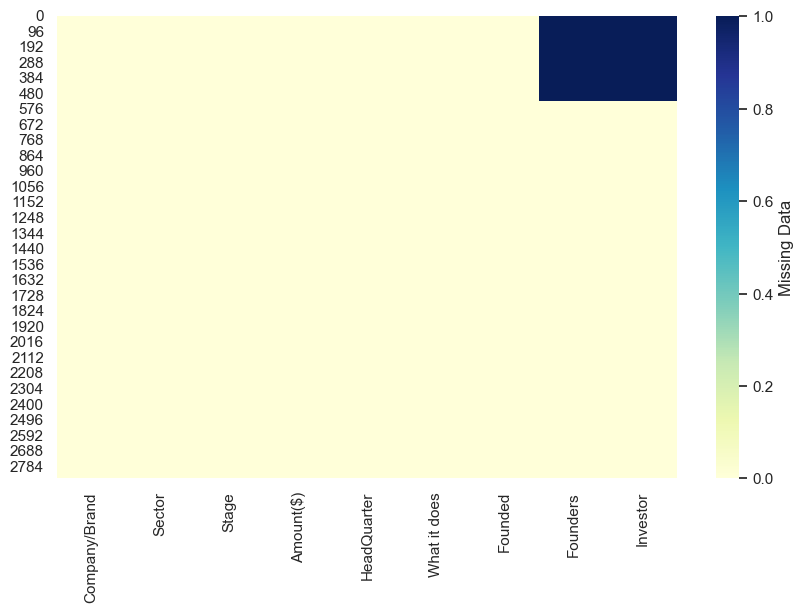

In [142]:
plt.figure(figsize=(10,6))
sns.heatmap(combined_data.isna(),
            cmap="YlGnBu",
            cbar_kws={'label': 'Missing Data'})

The heatmap indicate a clustered missing values for the founders and Investors column. This is as a result of the 2018 data set not having values for this field before the data set merge.

## Univariate Analysis

### 1. Analysis on The `Amount($)` Column

In [143]:
combined_data['Amount($)'].head(20)

0      250000.0
1      584000.0
2      949000.0
3     2000000.0
4     1300000.0
5     1600000.0
6      233600.0
7      730000.0
8     1300000.0
9     1300000.0
10    1300000.0
11    1300000.0
12    1300000.0
13    1300000.0
14    1300000.0
15    1460000.0
16     150000.0
17    1100000.0
18    1300000.0
19       7300.0
Name: Amount($), dtype: float64

In [144]:
# calculate basic statistical measures
combined_data['Amount($)'].describe()

count    2.854000e+03
mean     9.825071e+07
std      3.099055e+09
min      0.000000e+00
25%      6.000000e+05
50%      2.000000e+06
75%      8.000000e+06
max      1.500000e+11
Name: Amount($), dtype: float64

The above metrics are visually inspected with a box plot below

<AxesSubplot:xlabel='Amount($)'>

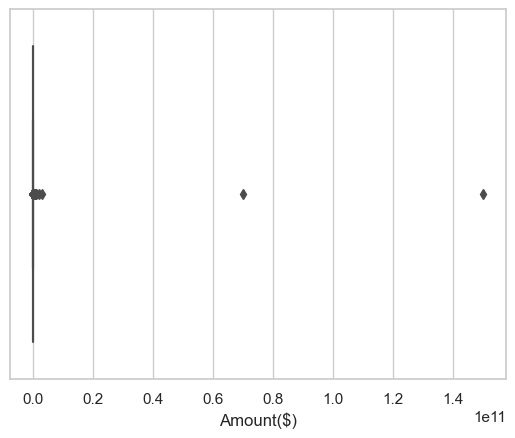

In [145]:
sns.boxplot(data=combined_data, x='Amount($)')

There are clear outliers in the amount column after which the rest of the values are clustered together

In [146]:
# calculate z-scores
z_score=scipy.stats.zscore(combined_data['Amount($)'])
z_score.head(20)

0    -0.031628
1    -0.031521
2    -0.031403
3    -0.031064
4    -0.031289
5    -0.031193
6    -0.031634
7    -0.031473
8    -0.031289
9    -0.031289
10   -0.031289
11   -0.031289
12   -0.031289
13   -0.031289
14   -0.031289
15   -0.031238
16   -0.031661
17   -0.031354
18   -0.031289
19   -0.031707
Name: Amount($), dtype: float64

The z score is a type of statistical measurement that gives an idea of how far a raw score is from the mean of a distribution

In [147]:
# find the indices of the outliers
outliers_index = np.where(z_score >3)[0]
outliers_index

array([ 892, 1739], dtype=int64)

In [148]:
# remove the outliers
combined_data = combined_data.drop(combined_data.index[outliers_index])

<AxesSubplot:xlabel='Amount($)'>

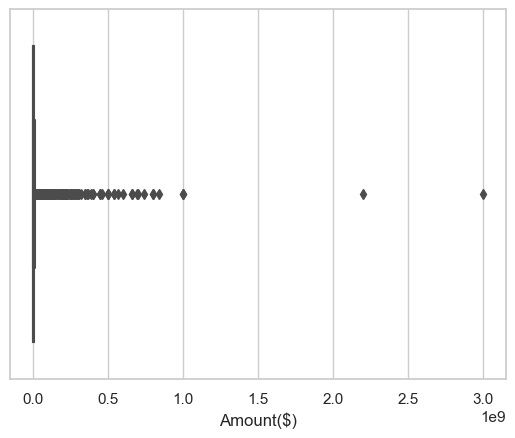

In [149]:
sns.boxplot(data=combined_data, x='Amount($)')

There seem to be more outliers which has the potential of distorting the mean. The median will however be less affected

### 2. Analysis of the `Stage` Column

In [150]:
(combined_data["Stage"].value_counts(normalize=True)*100)

Seed        65.743338
Series A    21.037868
Series B     5.469846
Series C     4.137447
Series D     1.823282
Series E     1.051893
Series F     0.455820
Series H     0.140252
Series G     0.105189
Series I     0.035063
Name: Stage, dtype: float64

The high count of unnknowns is as a result of the 2018 data set. The info above is in percentage terms. This is graphically represented in the graph below

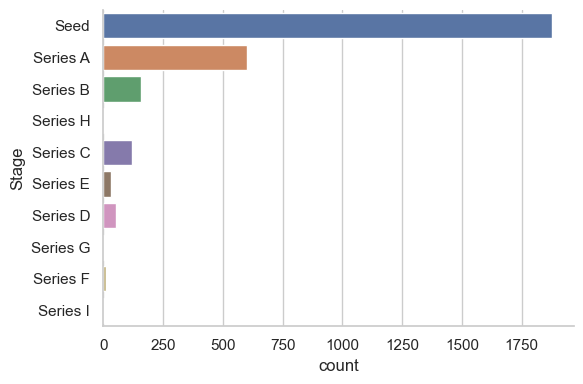

In [151]:
   fig=sns.catplot(y="Stage",data=combined_data, kind="count", height=4, aspect=1.5)

### 3. Analysis of the `Sector` Column

In [152]:
(combined_data["Sector"].value_counts(normalize=True)*100)

FinTech                9.256662
Healthcare             6.767181
IT                     6.486676
E-Commerce             6.276297
Education              5.925666
                         ...   
File Sharing           0.035063
Dietary Supplements    0.035063
Embedded Systems       0.035063
Government             0.035063
Maritime               0.035063
Name: Sector, Length: 89, dtype: float64

The FinTech sector has the highest percentage of 9.2%, followed by Healthcare 6.8% etc. This is also represented graphically below

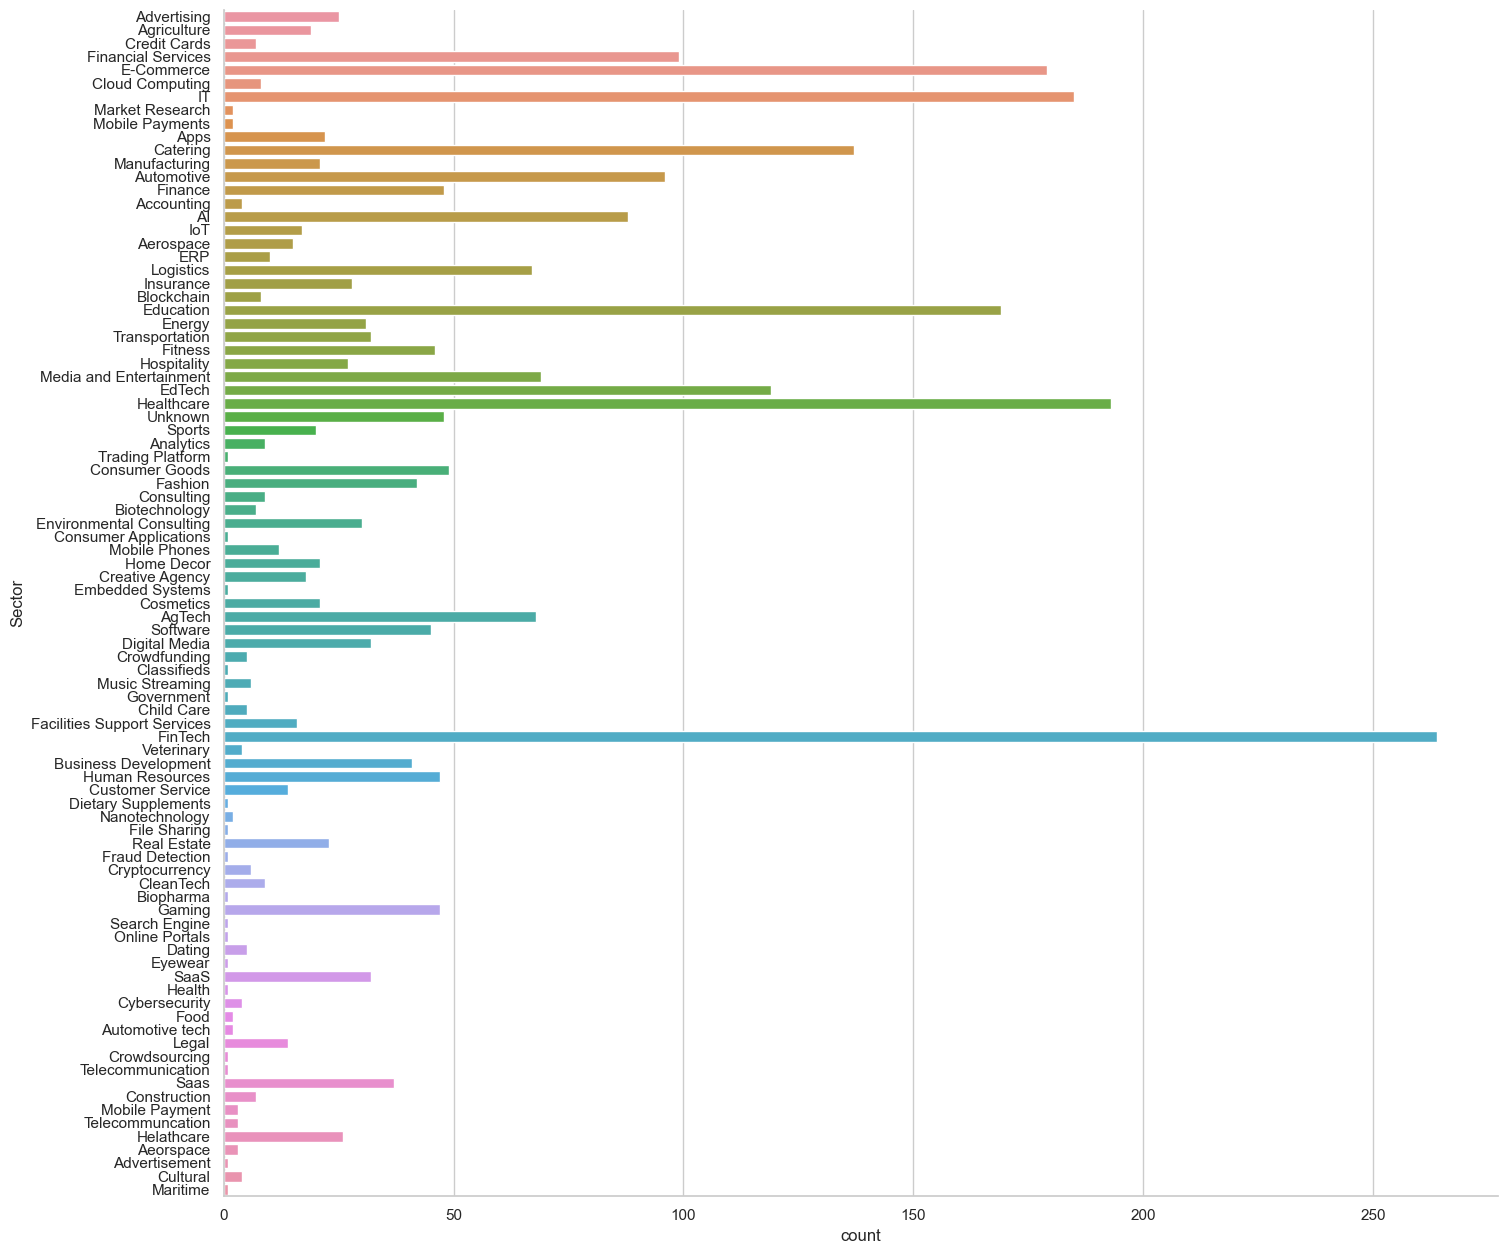

In [153]:
   sns.catplot(y="Sector",data=combined_data, kind="count", height=12.7, aspect=1.2)

Since there are about 90 different sectors, it will not be ideal to represent them all on a graph as it will not be visually appeaing, there compromising on undesrtanding. Futher analysis will sort either the top 120 or the least 10 for analysis

### 4. Analysis of the Founded Column

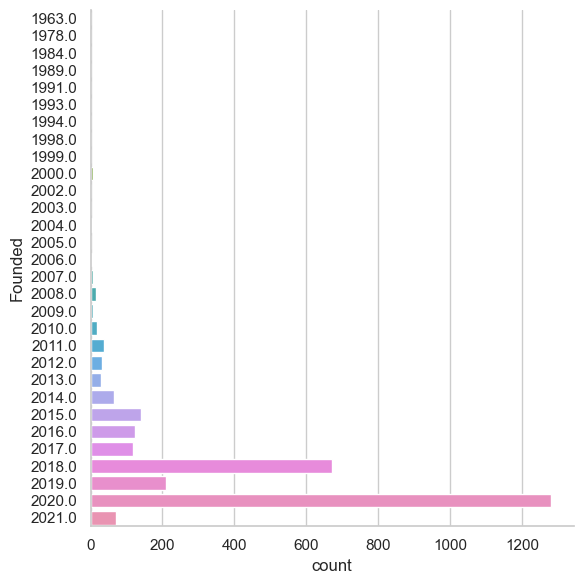

In [154]:
  sns.catplot(y="Founded",data=combined_data, kind="count", height=6, aspect=1)

## Multivariate Analysis

### 1. Analysis of the `Founded` and `Amount($)` Columns

In [155]:
# Group the DataFrame by the 'Stage' column and count the occurrences of each stage
amt_stage_count = combined_data.groupby('Founded')['Amount($)'].count()
amt_stage_count.head()

Founded
1963.0    1
1978.0    1
1984.0    1
1989.0    2
1991.0    1
Name: Amount($), dtype: int64

<AxesSubplot:xlabel='Amount($)', ylabel='Founded'>

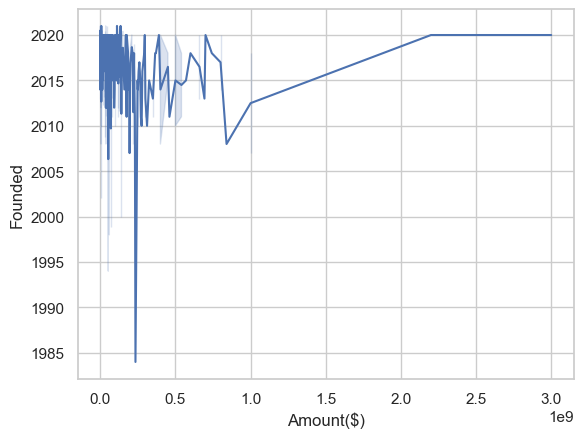

In [156]:
sns.lineplot(data=combined_data,
            y='Founded',
            x='Amount($)'
            )

The graph shows that only a few start up from 2012 and beyond have received enough funding. Again the funding for start-up took a marginal increase since 2012 and has since be on a stable rise

### 2. Analysis of the `Amount($)` and the `Founded` Column

<AxesSubplot:xlabel='Amount($)', ylabel='Founded'>

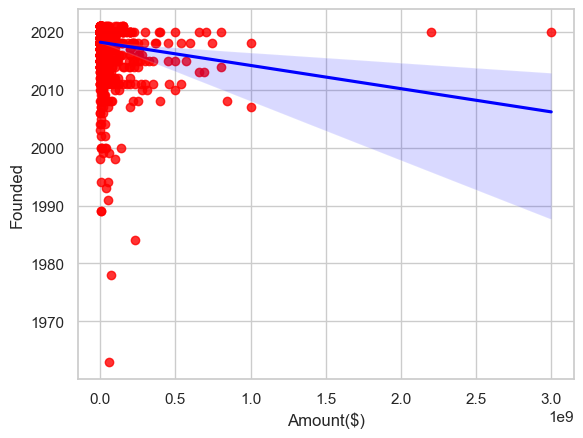

In [157]:
sns.regplot(x='Amount($)', y='Founded', data=combined_data, scatter_kws={'color':'red'}, line_kws={'color':'blue'})


The regression graph indicated a weak and negative relationship between year of funding and amount of funding

<AxesSubplot:>

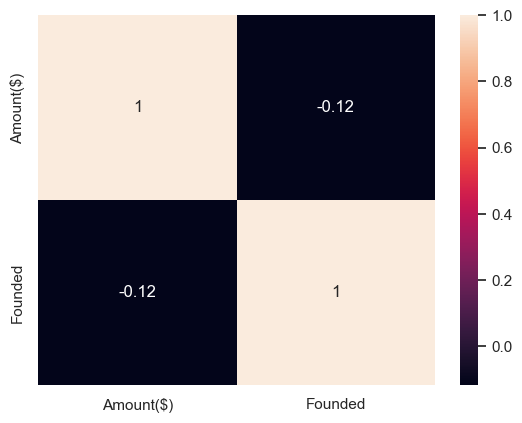

In [158]:
af_correlation = combined_data[['Amount($)', 'Founded']].corr()
sns.heatmap(af_correlation, annot=True)


### 3. Analysis of Stage and Founded Column

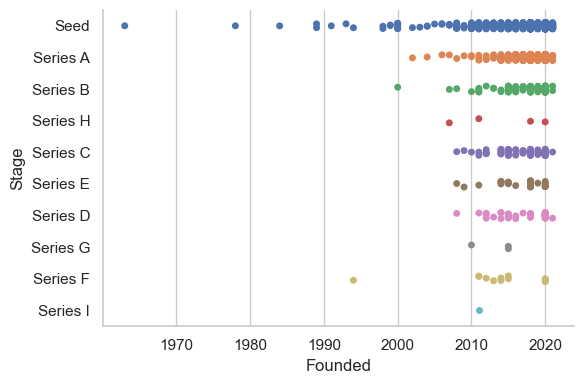

In [159]:
   fig=sns.catplot(y="Stage",x="Founded",data=combined_data, kind="strip", height=4, aspect=1.5)

It is observed that the seed stage has more spread across the various years as compared to the other stages. They are clustered between 2010 and 2021

### 4. Analysis of all other  Numeric Columns

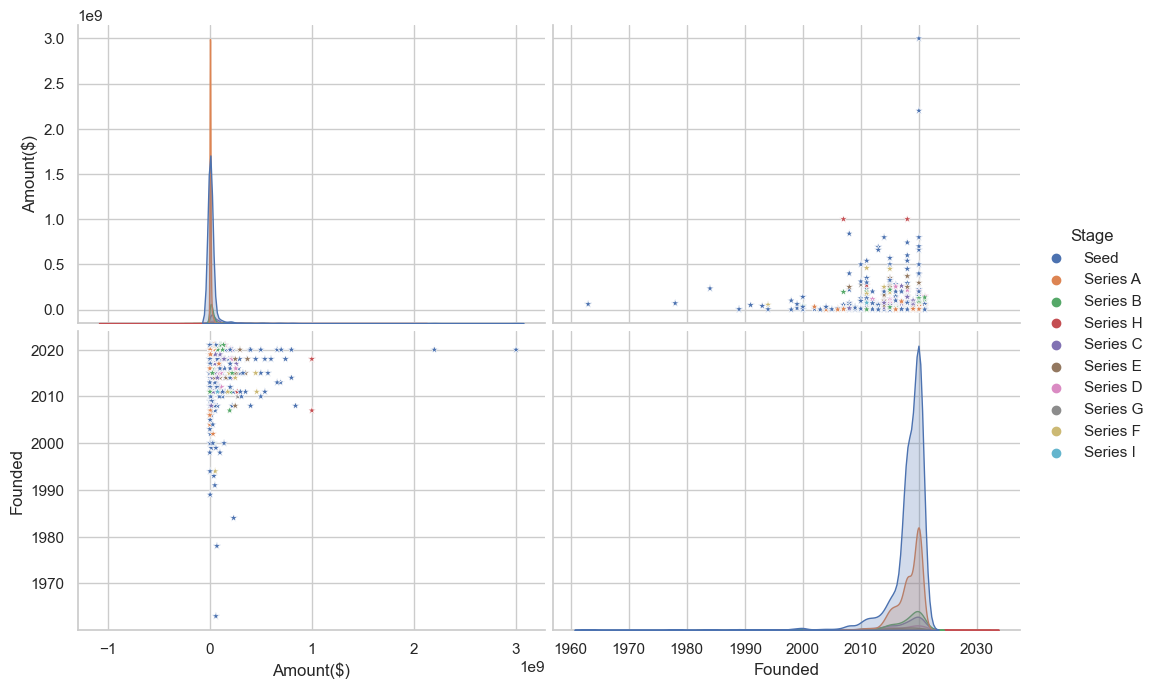

In [160]:
sns.pairplot(combined_data, vars=None, hue='Stage', diag_kind='auto', markers='*', plot_kws=None, diag_kws=None, grid_kws=None, height=3.5,aspect=1.5)

## Answering The Business Questions

### Question 1. Does the sort of industry have an impact on funding success?

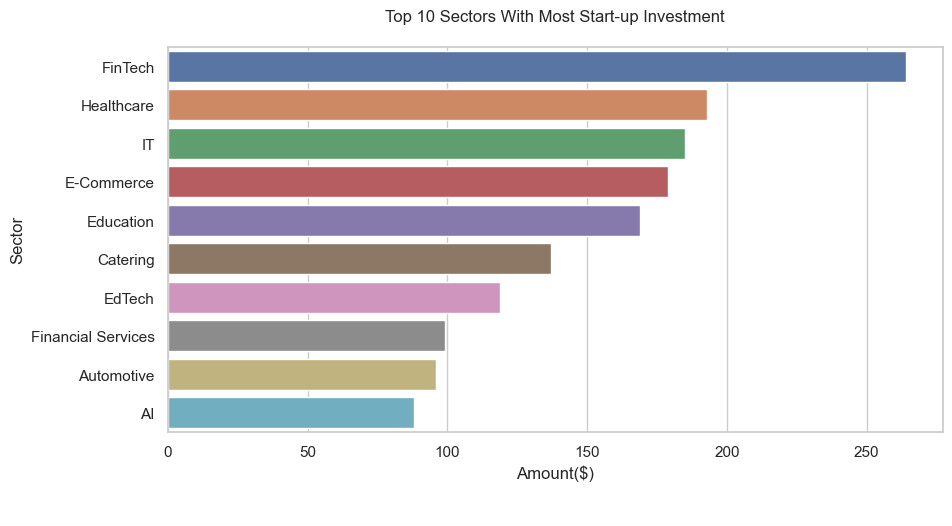

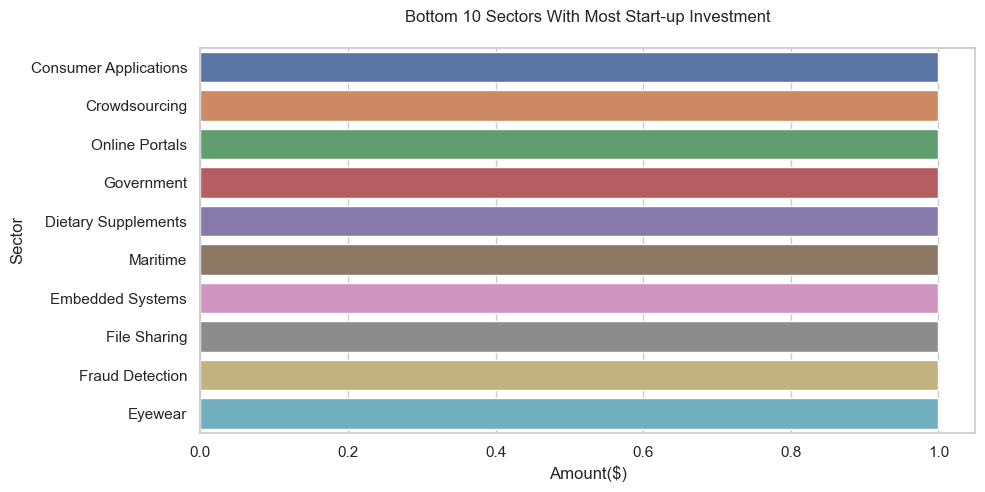

In [161]:
# Group the DataFrame by the 'sector' column and count the occurrences of each stage
sectoramt_count = combined_data.groupby('Sector')['Amount($)'].count().reset_index()

# # Sort the counts in descending order and select the top 10 values
top_count = sectoramt_count.sort_values(by='Amount($)', ascending=False).head(10)


# # Create the vertical bar chart
figure = plt.figure(figsize = (10, 5))
topgraph = sns.barplot(data=top_count, x='Amount($)', y='Sector',orient='h')

# Add labels and title
plt.ylabel("Sector")
plt.xlabel("Amount($)\n\n")
plt.title("Top 10 Sectors With Most Start-up Investment\n")
plt.show()

# Group the DataFrame by the 'sector' column and count the occurrences of each stage
sectoramt_count = combined_data.groupby('Sector')['Amount($)'].count().reset_index()

# # Sort the counts in descending order and select the last 10 values
bottom_count = sectoramt_count.sort_values(by='Amount($)', ascending=False).tail(10)

# # Create the vertical bar chart
figure = plt.figure(figsize = (10, 5))
bottomgraph = sns.barplot(data=bottom_count, x='Amount($)', y='Sector',orient='h')

# Add labels and title
plt.ylabel("Sector")
plt.xlabel("Amount($)")
plt.title("Bottom 10 Sectors With Most Start-up Investment\n")
plt.show()

gp=top_count = sectoramt_count.sort_values(by='Amount($)', ascending=False)


The two graph above confirms that the the sector or industry of the start-up can influence the funding it receives. Other varibales like the stage of the start-up might come to play. However, the sector affects the amount of funding received.

The first graph which showed the top 10 indicates that most of the funding were received in technology dominated sectors.
The second graph which show the bottom 10. indicates less difference in the sectors as most of them received similar funding

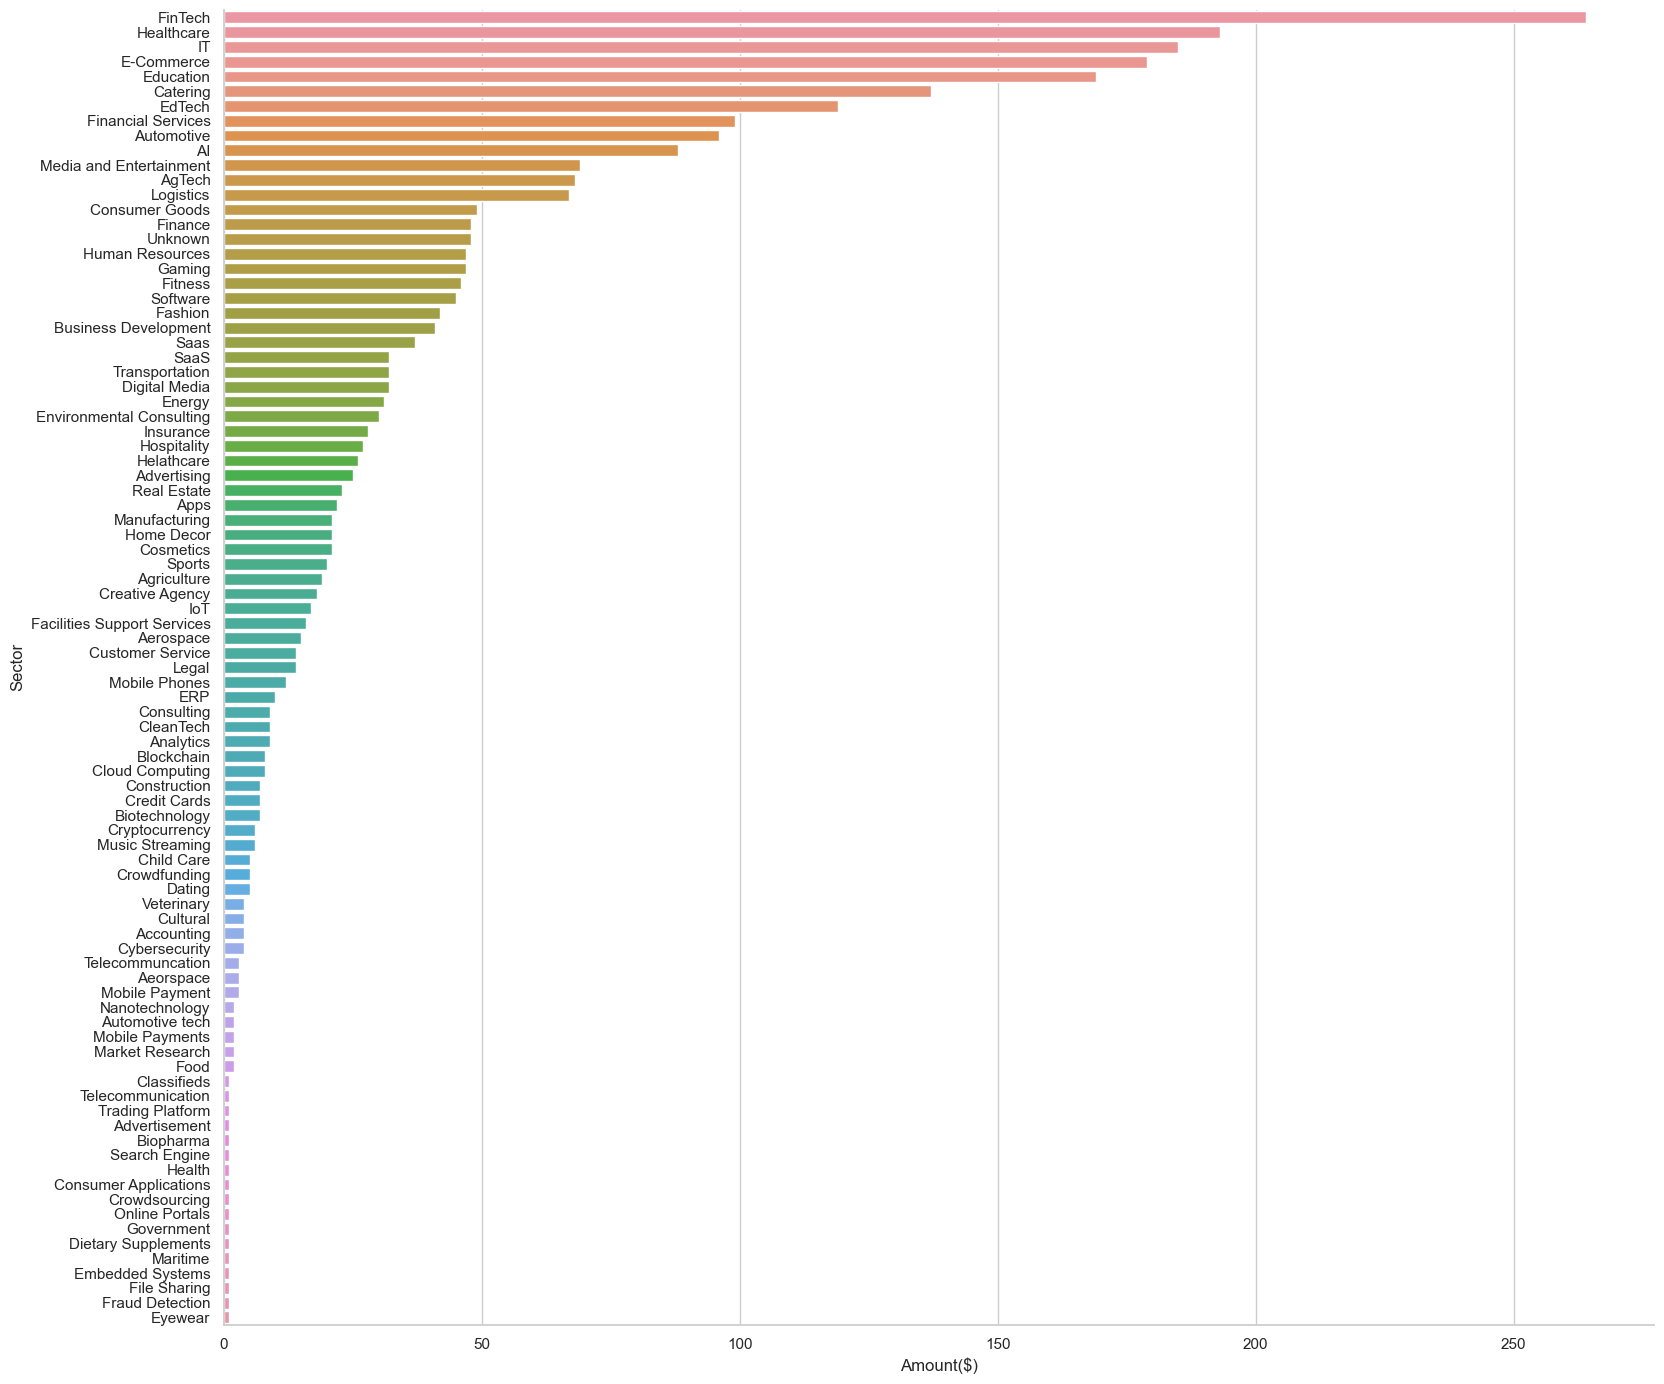

In [162]:
sns.catplot(data=gp, y='Sector',x='Amount($)', kind='bar', height=14, aspect=1.2)

### Question 2. Can the success of obtaining finance from investors be impacted by location?

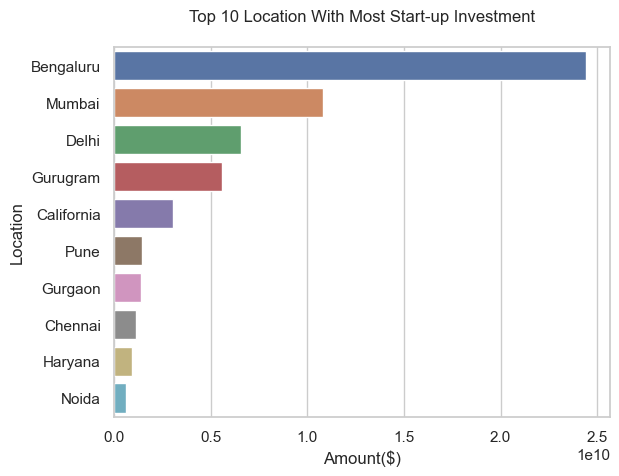

In [163]:
# Group the DataFrame by the 'headquater' column and count the occurrences of each stage
hqamt_grp = combined_data.groupby('HeadQuarter')['Amount($)'].sum().reset_index()

# # Sort the counts in descending order and select the top 10 values
top_grp = hqamt_grp.sort_values(by = 'Amount($)', ascending = False).head(10)

# # Create the vertical bar chart
sns.barplot(data=top_grp, x='Amount($)', y='HeadQuarter',orient='h',)

plt.ylabel("Location")
plt.xlabel("Amount($)")
plt.title("Top 10 Location With Most Start-up Investment\n")
plt.show()


The graph supports the notion that the location of the start up can  affect its funding. 

### Question 3. Which stage receives more investment from investors for start-ups?

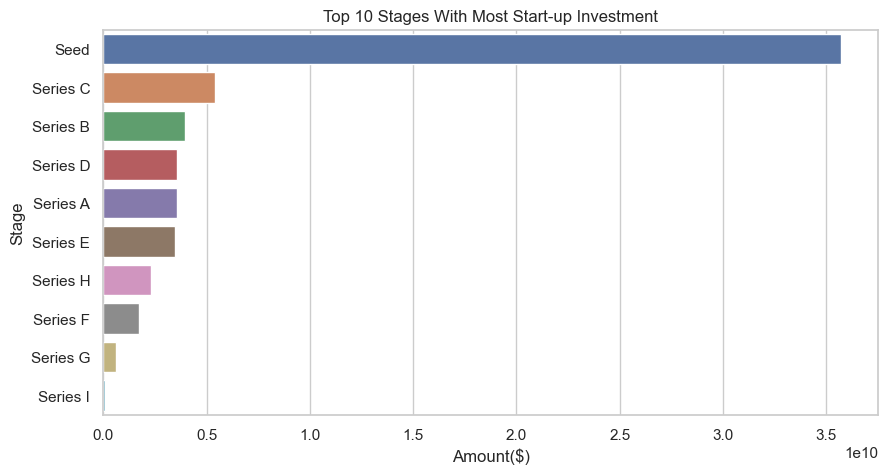

In [164]:
# Group the DataFrame by the 'Stage' column and count the occurrences of each stage
stageamt_grp = combined_data.groupby('Stage')['Amount($)'].sum().reset_index()

# # Sort the counts in descending order and select the top 10 values
stageamt_grp = stageamt_grp.sort_values(by = 'Amount($)', ascending = False).head(10)


figure = plt.figure(figsize = (10, 5))

# Create a bar chart using seaborn
sns.barplot(y='Stage', x='Amount($)', data=stageamt_grp)

# Add labels and title
plt.ylabel("Stage")
plt.xlabel("Amount($)")
plt.title("Top 10 Stages With Most Start-up Investment")

# Rotate y-labels by 30 degrees
#ax.set_yticklabels(ax.get_yticklabels(), rotation=30)


# set y ticks and labels
plt.xticks(rotation = 0)

# Show the plot
plt.show()


The seed stage has the highest start-up investment

### Question 4. Who makes the biggest investments among investors?

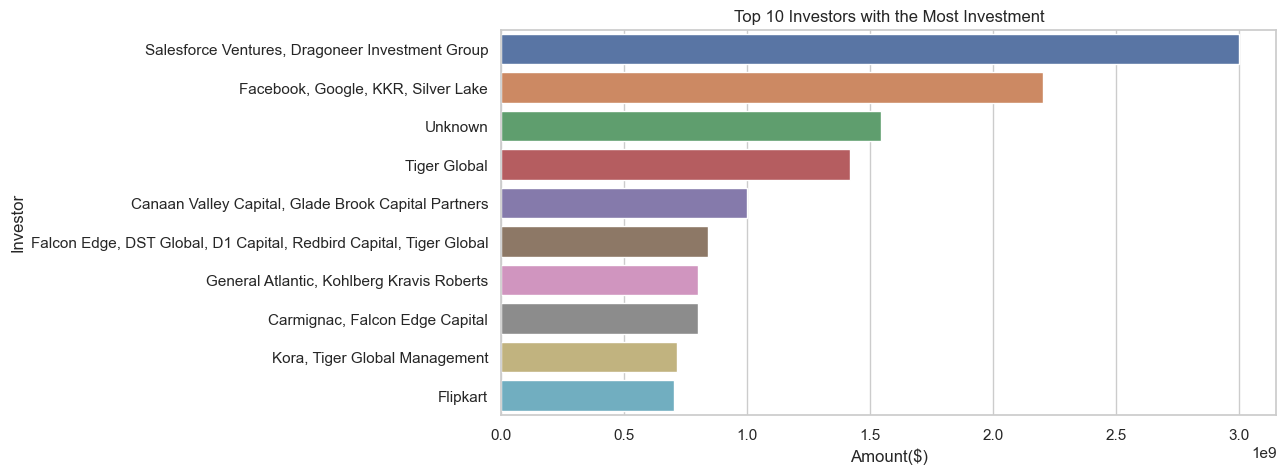

In [165]:

# Group the DataFrame by the 'investors' column and count the occurrences of each stage
invamt_grp = combined_data.groupby('Investor')['Amount($)'].sum().reset_index()

# # Sort the counts in descending order and select the top 10 values
invamt_grp = invamt_grp.sort_values(by = 'Amount($)', ascending = False).head(10)


figure = plt.figure(figsize = (10, 5))

# Create a bar chart using seaborn
sns.barplot(y='Investor', x='Amount($)', data=invamt_grp)

# Add labels and title
plt.ylabel("Investor")
plt.xlabel("Amount($)")
plt.title("Top 10 Investors with the Most Investment")

# Rotate y-labels by 30 degrees
#ax.set_yticklabels(ax.get_yticklabels(), rotation=30)


# set y ticks and labels
plt.xticks(rotation = 0)

# Show the plot
plt.show()

### Question 5. Can the startup's Year of founding affect the Amount of funding it receives from investors?

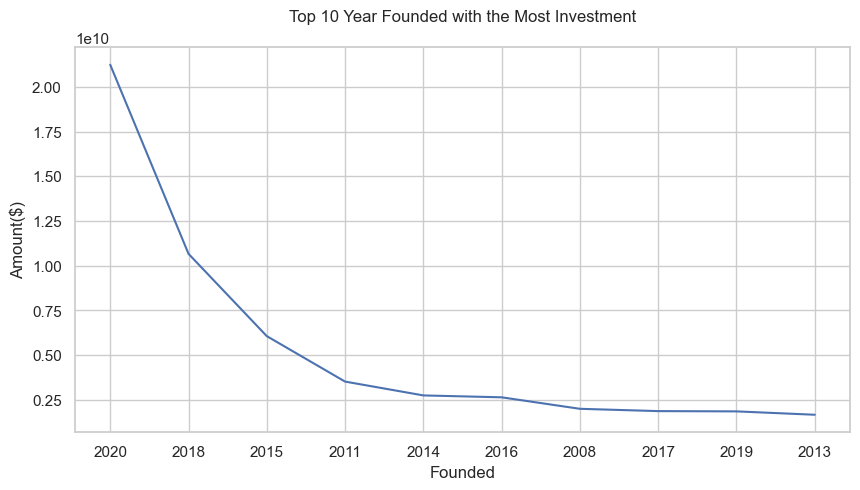

In [166]:
combined_data['Founded']=combined_data['Founded'].astype(str)
combined_data['Founded']=combined_data.Founded.str.split('.').str[0]

# Group the DataFrame by the 'investors' column and count the occurrences of each stage
famt_grp = combined_data.groupby('Founded')['Amount($)'].sum().reset_index()

# # Sort the counts in descending order and select the top 10 values
famt_grp = famt_grp.sort_values(by = 'Amount($)', ascending = False).head(10)


figure = plt.figure(figsize = (10, 5))

# Create a bar chart using seaborn
sns.lineplot(x='Founded', y='Amount($)', data=famt_grp)

# Add labels and title
plt.xlabel("Founded")
plt.ylabel("Amount($)")
plt.title("Top 10 Year Founded with the Most Investment\n")

# Rotate y-labels by 30 degrees
#ax.set_yticklabels(ax.get_yticklabels(), rotation=30)


# set y ticks and labels
plt.xticks(rotation = 0)

# Show the plot
plt.show()

Year founded was on a sinificant rise in 2019 after years of fluctuating runs. However it to a sharp decline in 2019 and re sparked in 2020. Again 2021 missed out on the top 10 as it was on a heavy decline

### Hypothesis Testing

In [167]:
# # Create a variable to hold the columns on which hypothesis is to be tested
# hypothesis = pd.crosstab(combined_data['Founded'], combined_data['Amount($)'])

combined_data['Founded']=combined_data['Founded'].astype(int)

# # Perform the t test
t,p=stats.ttest_ind(combined_data['Founded'],combined_data['Amount($)'])
print("P-value:", p)
print("T-value:", t)

P-value: 5.4702977881541176e-31
T-value: -11.644588393291016


since the p-value  is less than the the significant value of 0.05, the null hypothesis is rejected.